In [ ]:
#Importing necessary library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Data Preprocessing

In [ ]:
# Read the dataset
fifa_data = pd.read_csv('/content/drive/MyDrive/male_players (legacy).csv')

In [ ]:
fifa_data.head()

,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
0,158023,/player/158023/lionel-messi/150002,15,2,2014-09-18,L. Messi,Lionel Andrés Messi Cuccittini,CF,93,95,...,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3,15+3,https://cdn.sofifa.net/players/158/023/15_120.png
1,20801,/player/20801/c-ronaldo-dos-santos-aveiro/150002,15,2,2014-09-18,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"LW, LM",92,92,...,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3,16+3,https://cdn.sofifa.net/players/020/801/15_120.png
2,9014,/player/9014/arjen-robben/150002,15,2,2014-09-18,A. Robben,Arjen Robben,"RM, LM, RW",90,90,...,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3,14+3,https://cdn.sofifa.net/players/009/014/15_120.png
3,41236,/player/41236/zlatan-ibrahimovic/150002,15,2,2014-09-18,Z. Ibrahimović,Zlatan Ibrahimović,ST,90,90,...,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3,17+3,https://cdn.sofifa.net/players/041/236/15_120.png
4,167495,/player/167495/manuel-neuer/150002,15,2,2014-09-18,M. Neuer,Manuel Peter Neuer,GK,90,90,...,40+3,40+3,36+3,36+3,38+3,38+3,38+3,36+3,87+3,https://cdn.sofifa.net/players/167/495/15_120.png


In [ ]:
#sanity check
#checking the shape (number of rows and columns)
fifa_data.shape

(161583, 110)

In [ ]:
#selecting columns that are necessary for our training
for i in fifa_data.columns:
    print(i)

player_id
player_url
fifa_version
fifa_update
fifa_update_date
short_name
long_name
player_positions
overall
potential
value_eur
wage_eur
age
dob
height_cm
weight_kg
league_id
league_name
league_level
club_team_id
club_name
club_position
club_jersey_number
club_loaned_from
club_joined_date
club_contract_valid_until_year
nationality_id
nationality_name
nation_team_id
nation_position
nation_jersey_number
preferred_foot
weak_foot
skill_moves
international_reputation
work_rate
body_type
real_face
release_clause_eur
player_tags
player_traits
pace
shooting
passing
dribbling
defending
physic
attacking_crossing
attacking_finishing
attacking_heading_accuracy
attacking_short_passing
attacking_volleys
skill_dribbling
skill_curve
skill_fk_accuracy
skill_long_passing
skill_ball_control
movement_acceleration
movement_sprint_speed
movement_agility
movement_reactions
movement_balance
power_shot_power
power_jumping
power_stamina
power_strength
power_long_shots
mentality_aggression
mentality_interceptio

Removed columns with URLs and other personal details about players leagues and clubs because they don't affect the player ratings. Keeping them would make the model less accurate.


In [ ]:
firstAttributes = fifa_data[['overall', 'potential', 'age', 'height_cm', 'weight_kg', 'preferred_foot','weak_foot','skill_moves','international_reputation','work_rate','body_type','player_tags','player_traits' ]]
secondAttributes= fifa_data.loc[:, 'pace':'goalkeeping_speed']
fifa_data = pd.concat([firstAttributes,secondAttributes], axis=1)

In [ ]:
#finding missing values
fifa_data.isnull().sum()/fifa_data.shape[0]*100

overall                         0.000000
potential                       0.000000
age                             0.000000
height_cm                       0.000000
weight_kg                       0.000000
preferred_foot                  0.000000
weak_foot                       0.000000
skill_moves                     0.000000
international_reputation        0.000000
work_rate                       0.000000
body_type                       0.000000
player_tags                    92.163161
player_traits                  54.729148
pace                           11.120601
shooting                       11.120601
passing                        11.120601
dribbling                      11.120601
defending                      11.120601
physic                         11.120601
attacking_crossing              0.000000
attacking_finishing             0.000000
attacking_heading_accuracy      0.000000
attacking_short_passing         0.000000
attacking_volleys               0.000000
skill_dribbling 

Removing data with the highest percentage (more than 30%) of missing values


In [ ]:
threshold = 0.30*len(fifa_data)
fifa_data = fifa_data.dropna(thresh=threshold,axis= 1)

In [ ]:
#confirming the removed data after running the threshold
fifa_data.isnull().sum()/fifa_data.shape[0]*100

overall                         0.000000
potential                       0.000000
age                             0.000000
height_cm                       0.000000
weight_kg                       0.000000
preferred_foot                  0.000000
weak_foot                       0.000000
skill_moves                     0.000000
international_reputation        0.000000
work_rate                       0.000000
body_type                       0.000000
player_traits                  54.729148
pace                           11.120601
shooting                       11.120601
passing                        11.120601
dribbling                      11.120601
defending                      11.120601
physic                         11.120601
attacking_crossing              0.000000
attacking_finishing             0.000000
attacking_heading_accuracy      0.000000
attacking_short_passing         0.000000
attacking_volleys               0.000000
skill_dribbling                 0.000000
skill_curve     

In [ ]:
fifa_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161583 entries, 0 to 161582
Data columns (total 52 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   overall                      161583 non-null  int64  
 1   potential                    161583 non-null  int64  
 2   age                          161583 non-null  int64  
 3   height_cm                    161583 non-null  int64  
 4   weight_kg                    161583 non-null  int64  
 5   preferred_foot               161583 non-null  object 
 6   weak_foot                    161583 non-null  int64  
 7   skill_moves                  161583 non-null  int64  
 8   international_reputation     161583 non-null  int64  
 9   work_rate                    161583 non-null  object 
 10  body_type                    161583 non-null  object 
 11  player_traits                73150 non-null   object 
 12  pace                         143614 non-null  float64
 13 

In [ ]:
#checking for duplicates
fifa_data.duplicated().sum()

251

In [ ]:
#Eploratory Data Analysis (EDA)

#descriptve analysis of the numerical columns
fifa_data.describe().T

,count,mean,std,min,25%,50%,75%,max
overall,161583.0,65.699071,7.040855,40.0,61.0,66.0,70.0,94.0
potential,161583.0,70.744008,6.259121,40.0,66.0,70.0,75.0,95.0
age,161583.0,25.123181,4.670207,16.0,21.0,25.0,28.0,54.0
height_cm,161583.0,181.240205,6.750148,154.0,176.0,181.0,186.0,208.0
weight_kg,161583.0,75.235031,7.000456,49.0,70.0,75.0,80.0,110.0
weak_foot,161583.0,2.939480,0.662863,1.0,3.0,3.0,3.0,5.0
skill_moves,161583.0,2.329905,0.751792,1.0,2.0,2.0,3.0,5.0
international_reputation,161583.0,1.107140,0.383605,1.0,1.0,1.0,1.0,5.0
pace,143614.0,68.022672,11.096042,21.0,62.0,69.0,76.0,97.0
shooting,143614.0,52.230764,13.921947,14.0,42.0,54.0,63.0,94.0


In [ ]:
fifa_data.head()

,overall,potential,age,height_cm,weight_kg,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,...,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,93,95,27,169,67,Left,3,4,5,Medium/Low,...,76,NaN,25,21,20,6,11,15,14,8
1,92,92,29,185,80,Right,4,5,5,High/Low,...,85,NaN,22,31,23,7,11,15,14,11
2,90,90,30,180,80,Left,2,4,5,High/Low,...,80,NaN,29,26,26,10,8,11,5,15
3,90,90,32,195,95,Right,4,4,5,Medium/Low,...,91,NaN,25,41,27,13,15,10,9,12
4,90,90,28,193,92,Right,4,1,5,Medium/Medium,...,37,NaN,25,25,25,87,85,92,90,86


In [ ]:
fifa_data.tail()

,overall,potential,age,height_cm,weight_kg,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,...,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
161578,46,61,18,180,73,Right,3,2,1,Medium/Medium,...,54,40.0,23,21,25,9,13,13,12,7
161579,46,58,19,188,83,Left,3,2,1,Medium/Medium,...,31,35.0,50,51,45,6,14,8,13,14
161580,46,58,19,181,73,Right,2,2,1,High/Medium,...,37,35.0,36,45,50,8,9,7,14,9
161581,46,70,17,175,68,Right,3,2,1,Medium/Medium,...,63,43.0,19,17,14,13,12,14,7,13
161582,46,63,17,180,70,Right,3,2,1,Medium/Medium,...,25,30.0,50,45,42,13,7,6,6,14


In [ ]:
#descriptive statistics of categorical columns
fifa_data.describe(include= "object")

,preferred_foot,work_rate,body_type,player_traits
count,161583,161583,161583,73150
unique,2,9,10,3730
top,Right,Medium/Medium,Normal (170-185),Speed Dribbler (AI)
freq,123711,88772,56834,4440


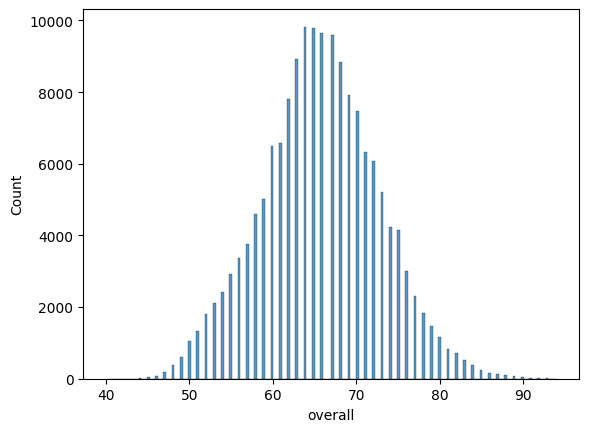

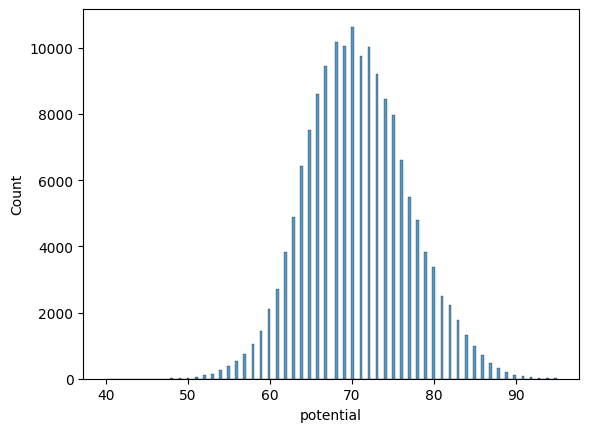

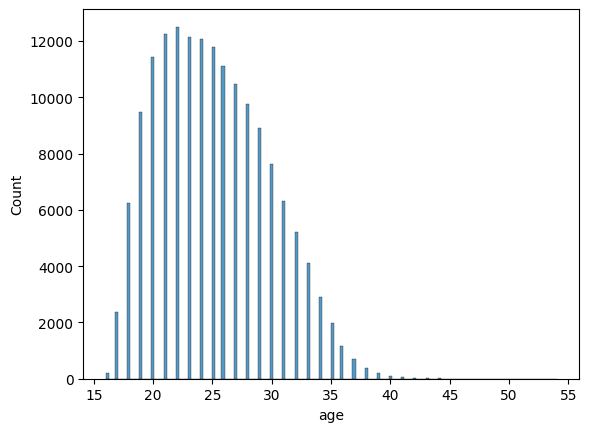

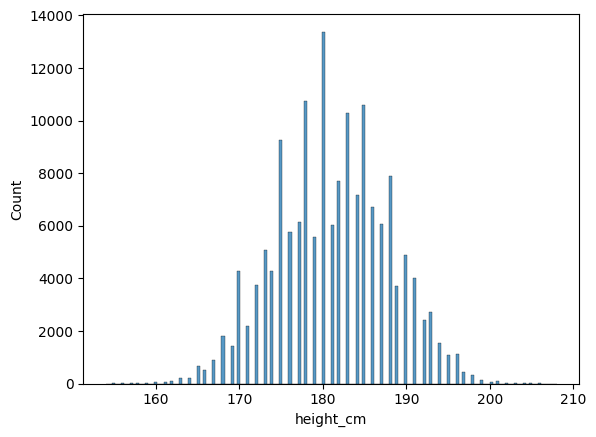

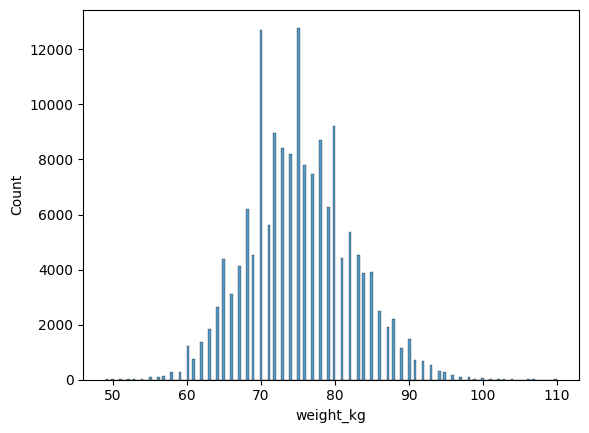

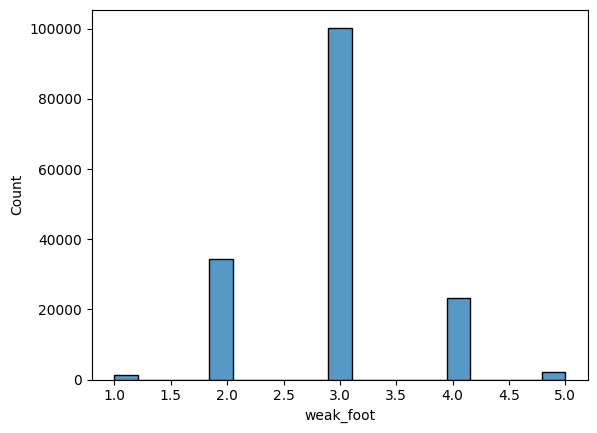

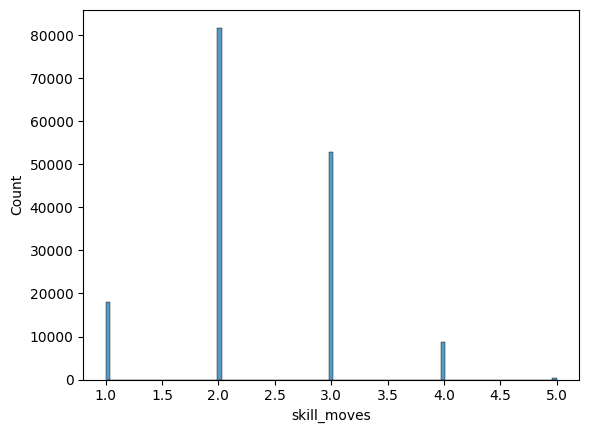

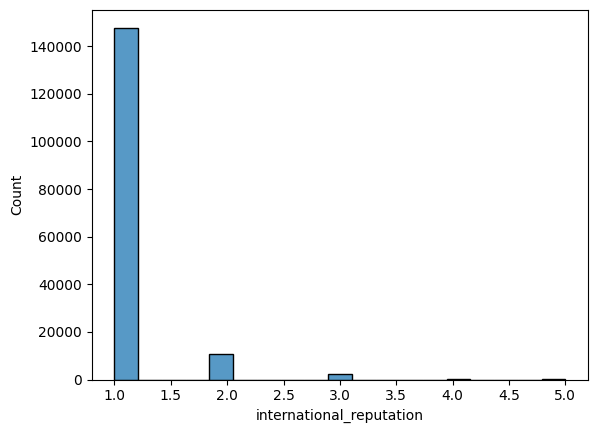

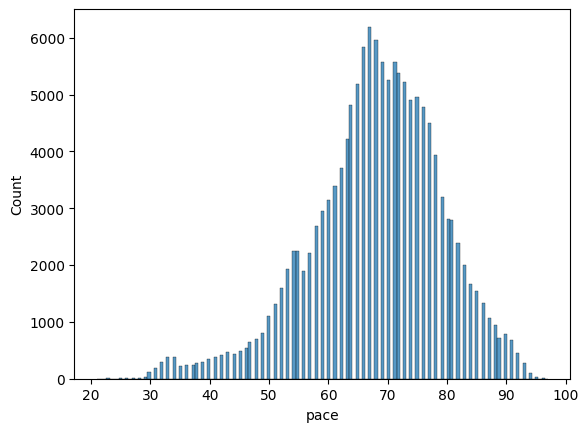

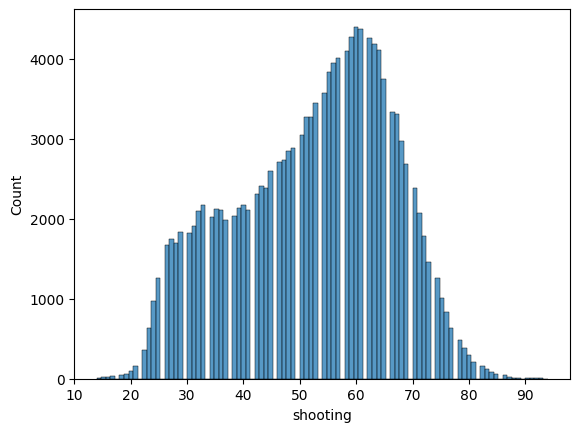

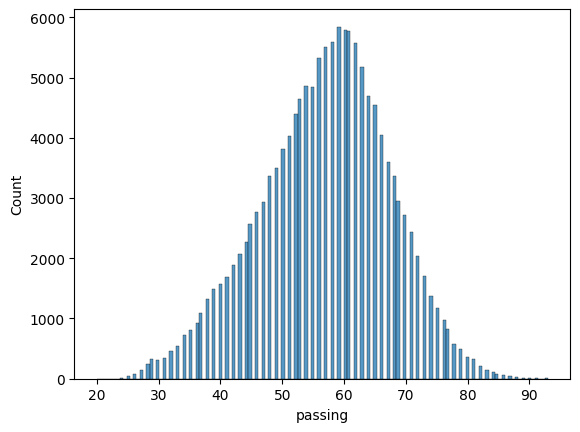

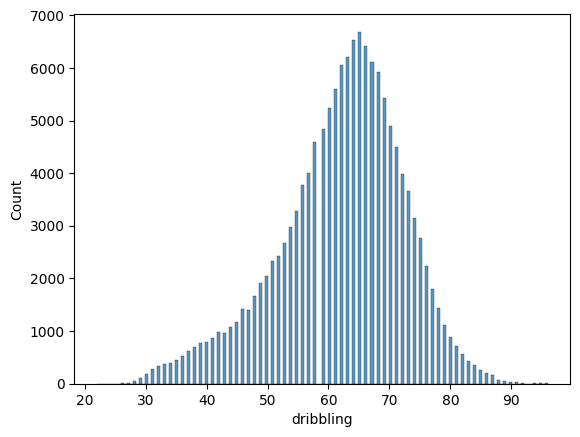

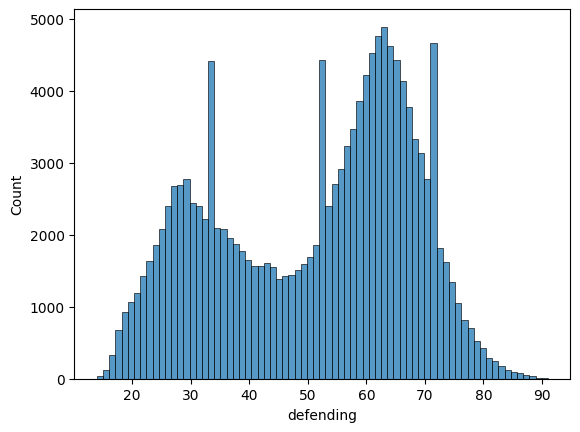

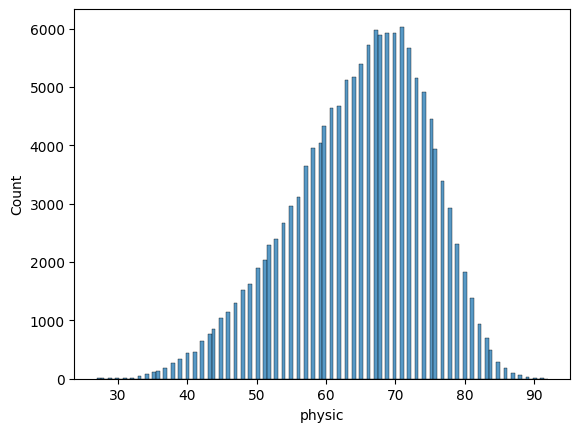

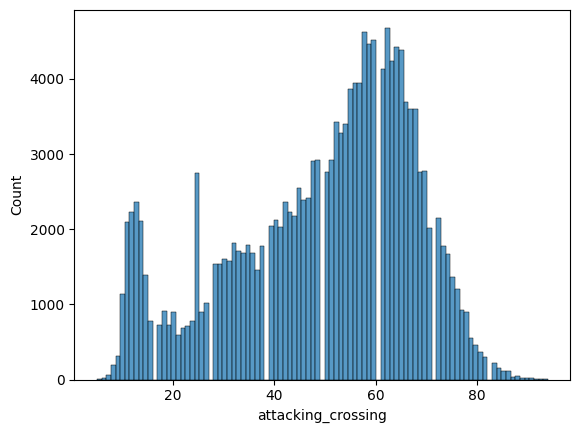

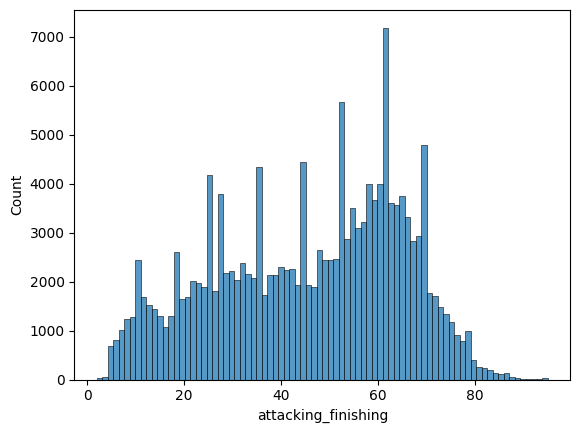

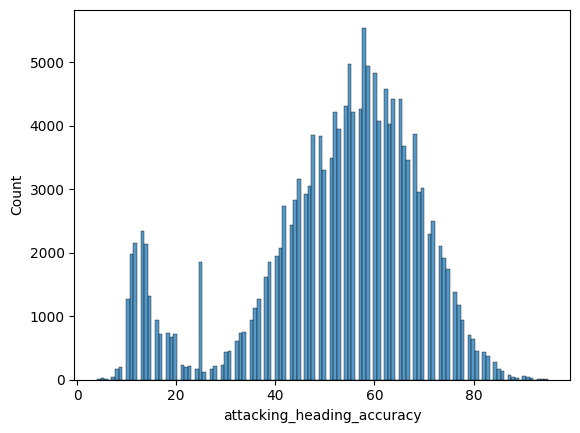

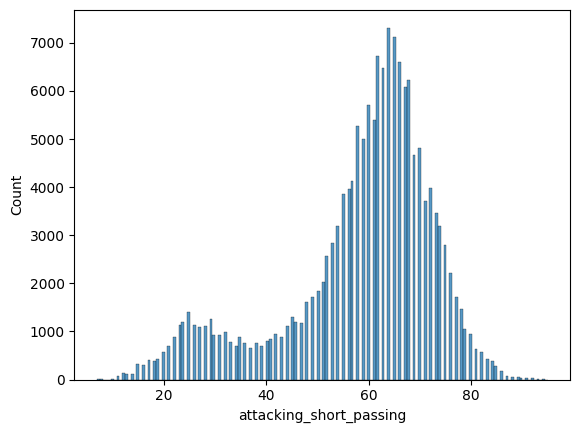

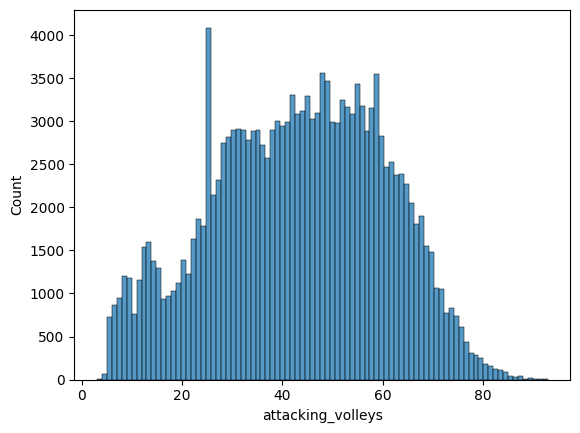

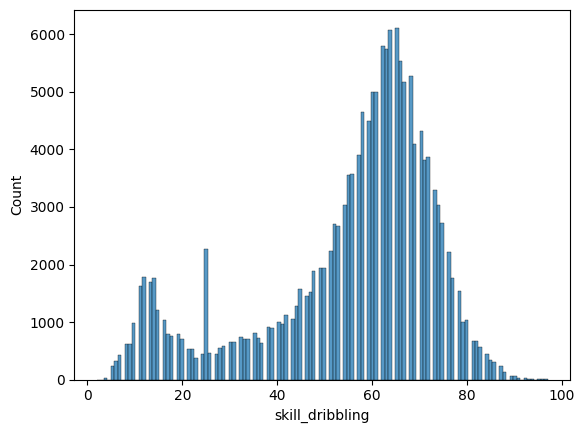

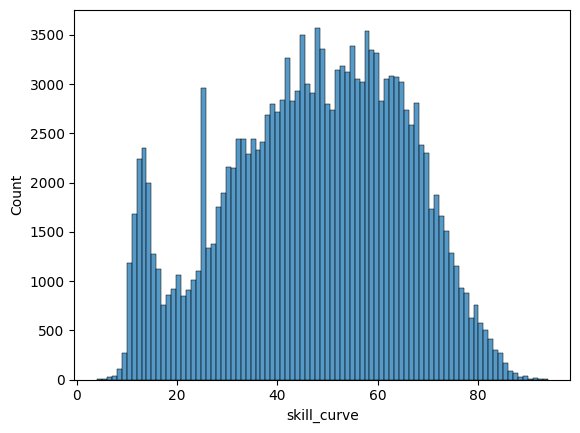

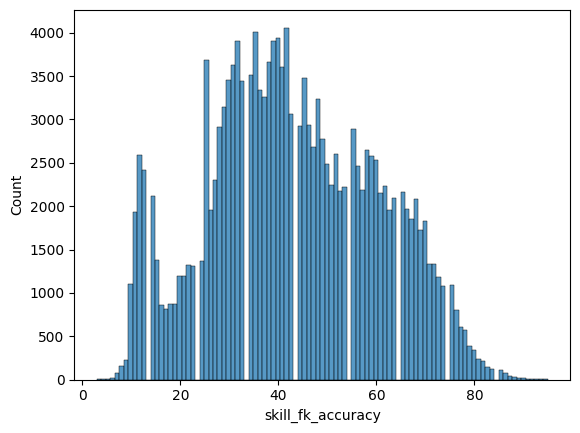

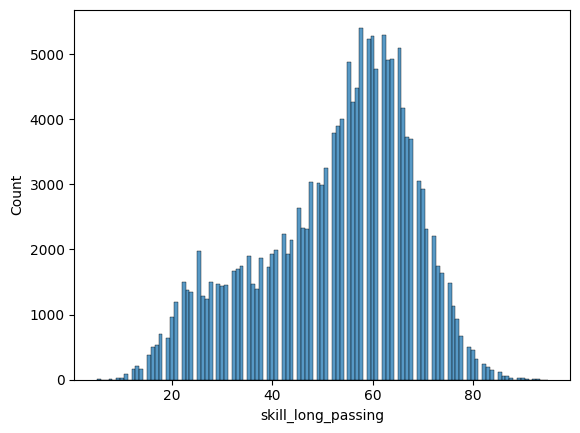

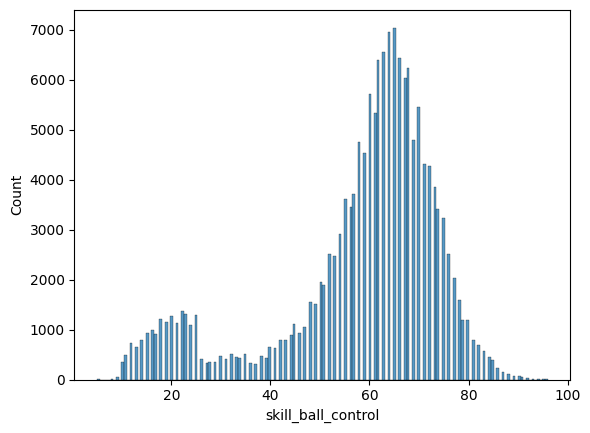

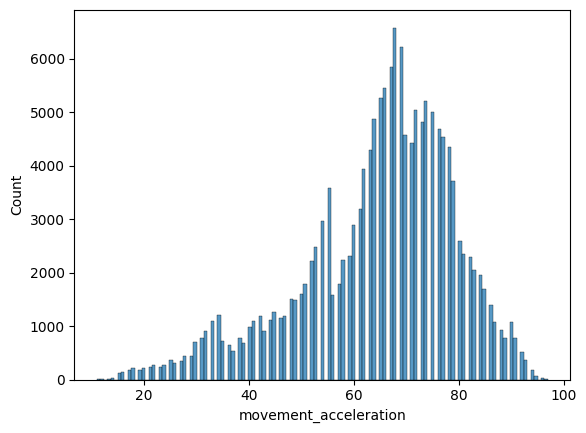

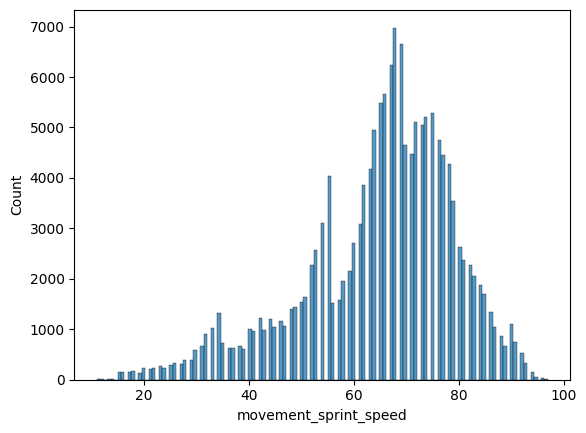

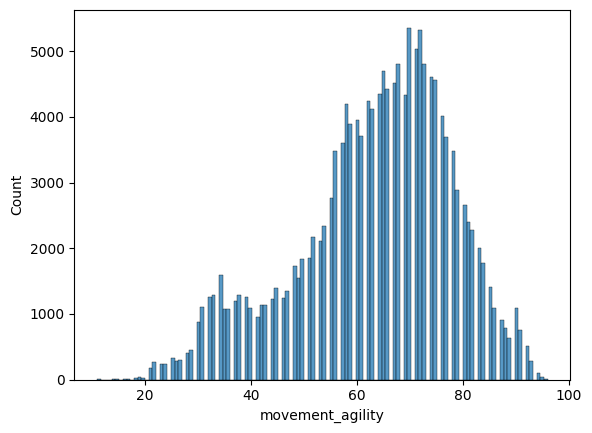

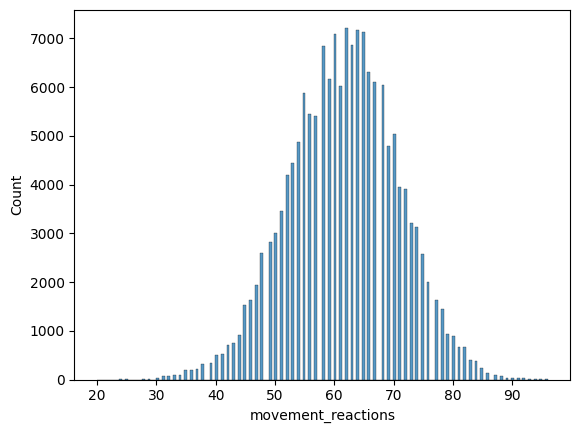

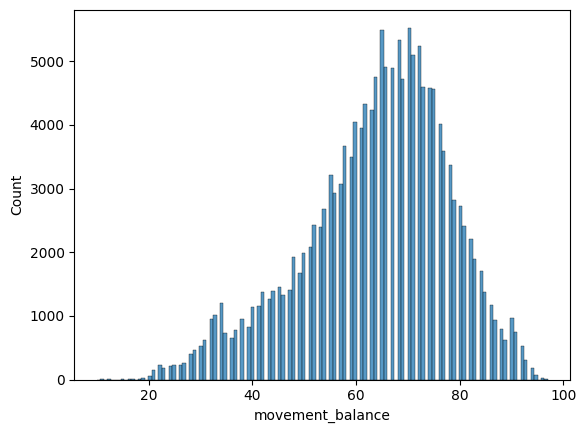

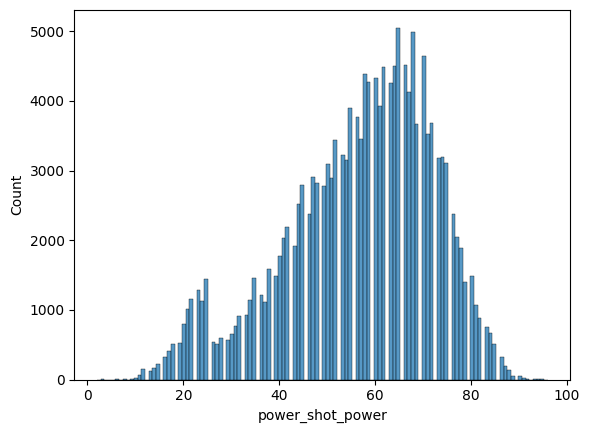

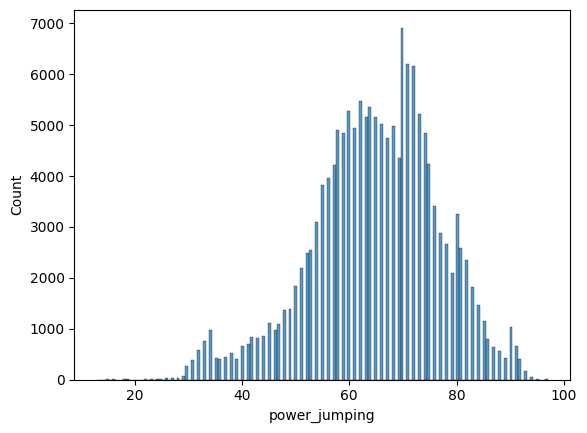

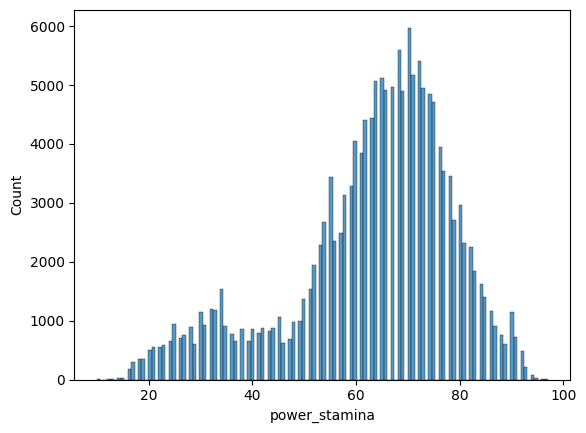

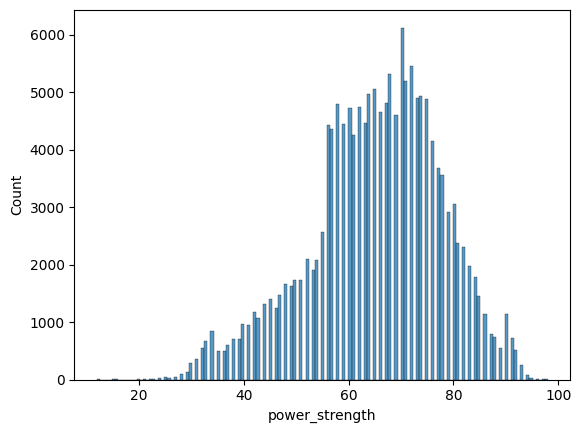

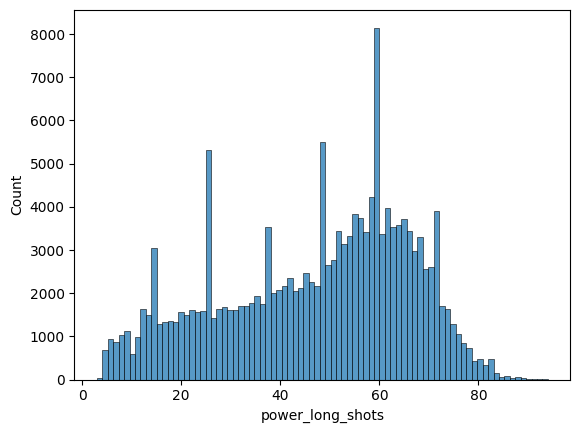

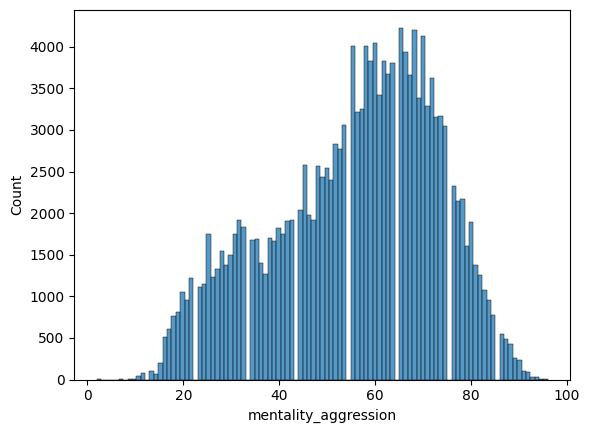

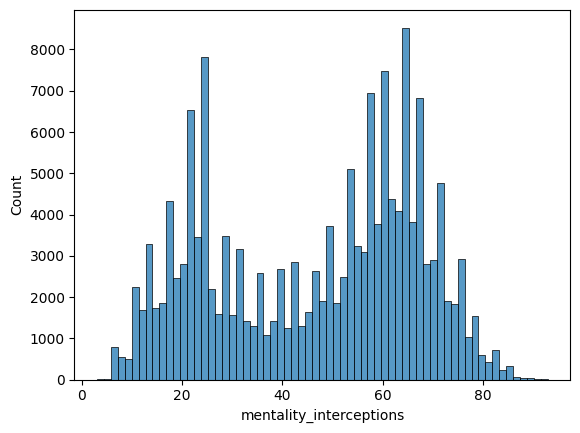

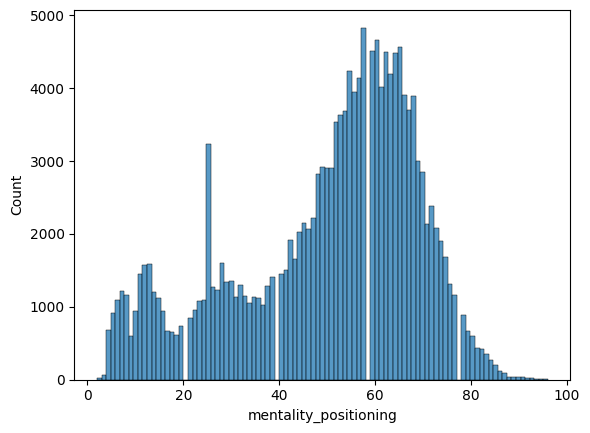

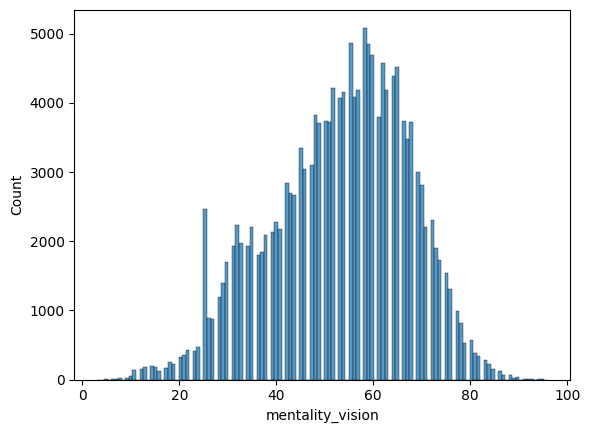

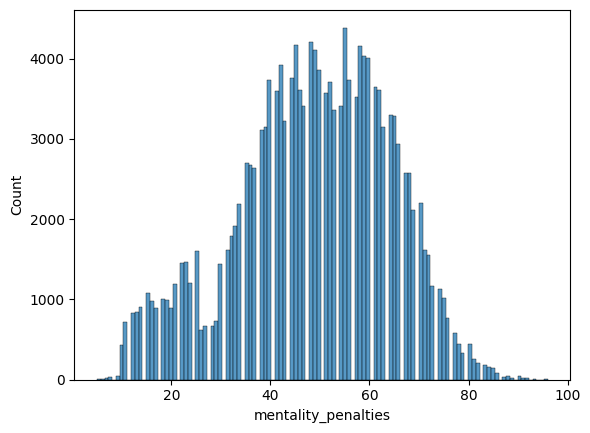

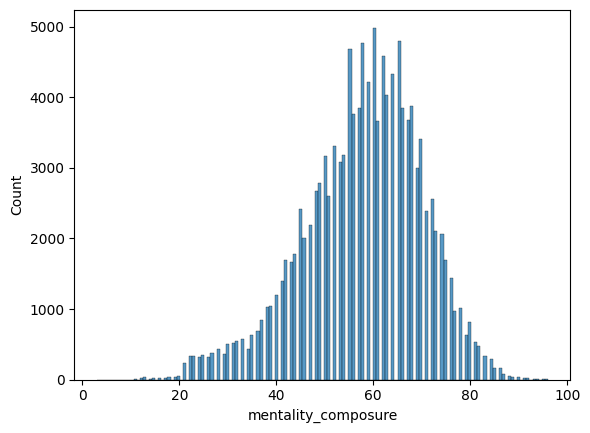

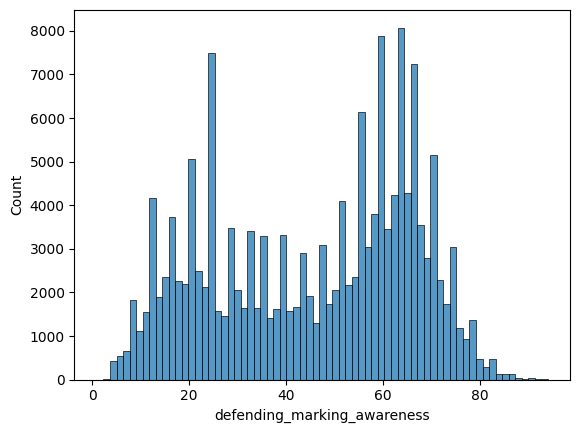

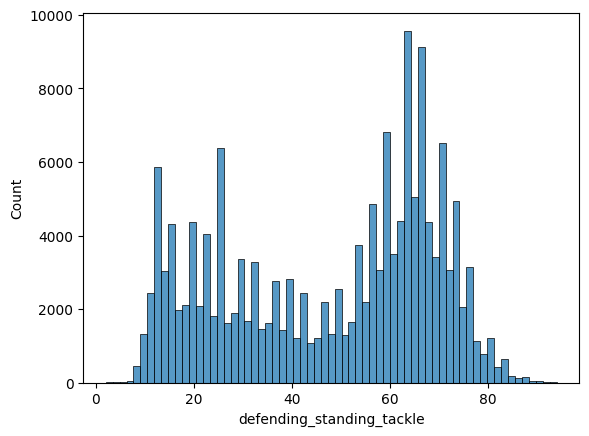

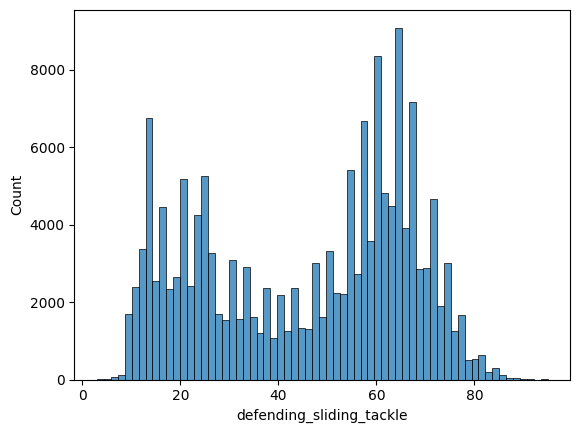

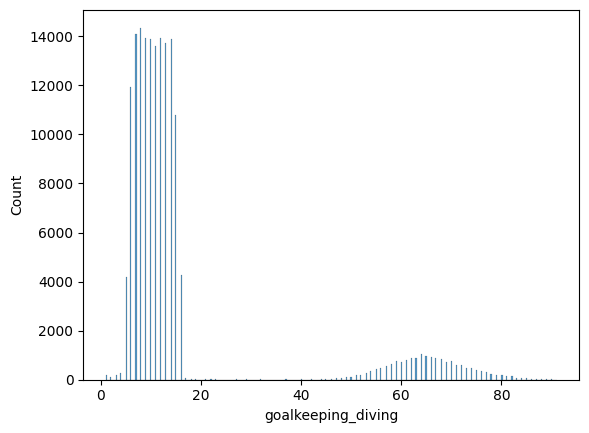

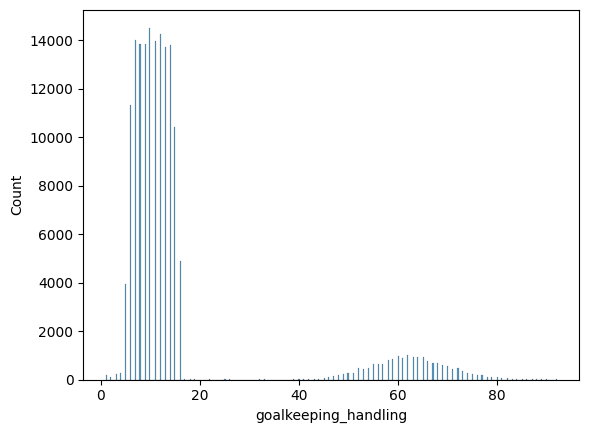

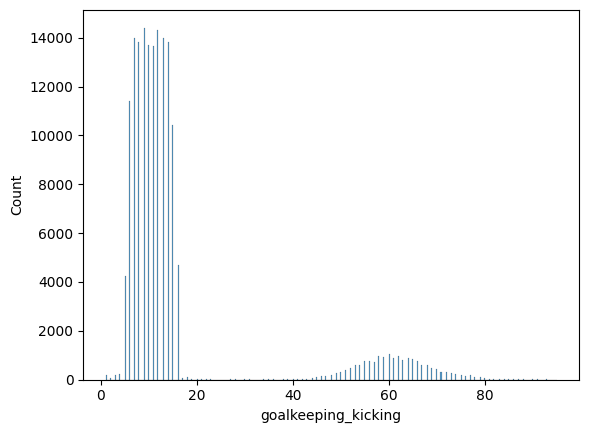

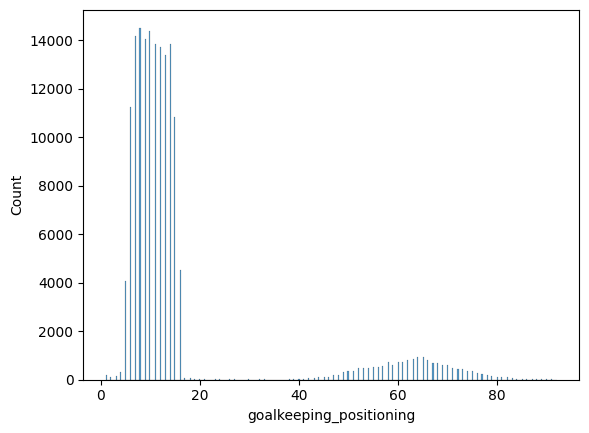

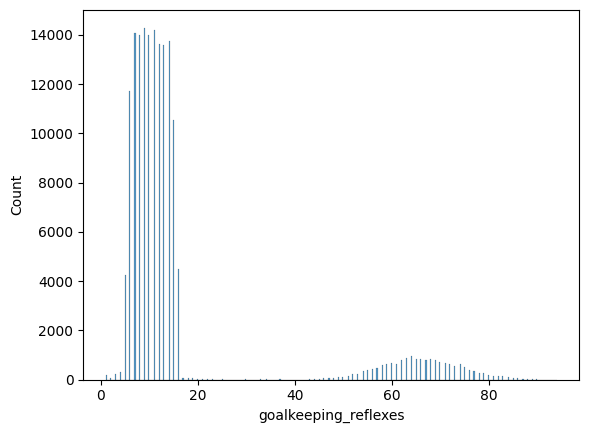

In [ ]:
#plotting histograms to see the distribution of the data
for i in fifa_data.select_dtypes(include="number").columns:
    sns.histplot(data= fifa_data, x=i)
    plt.show()

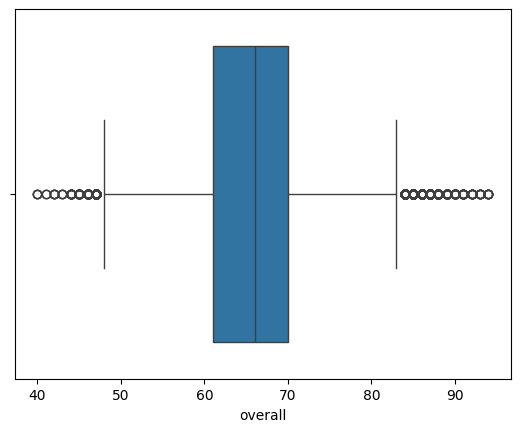

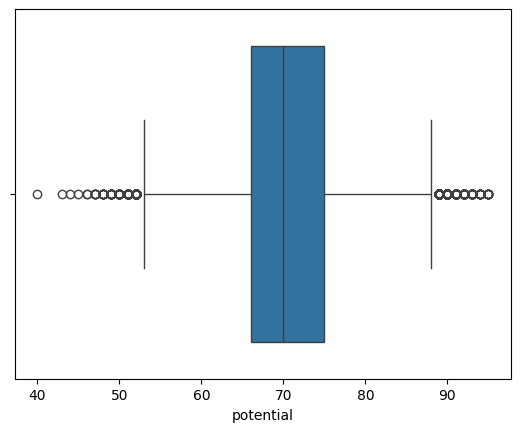

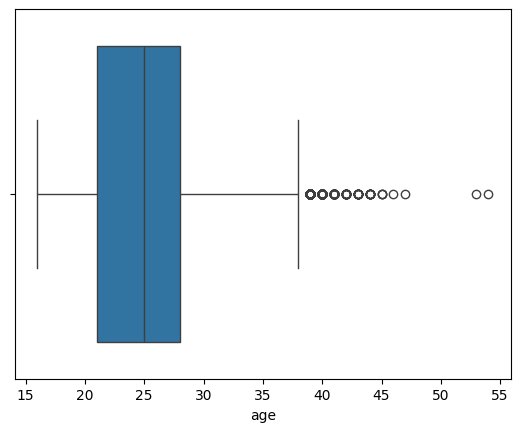

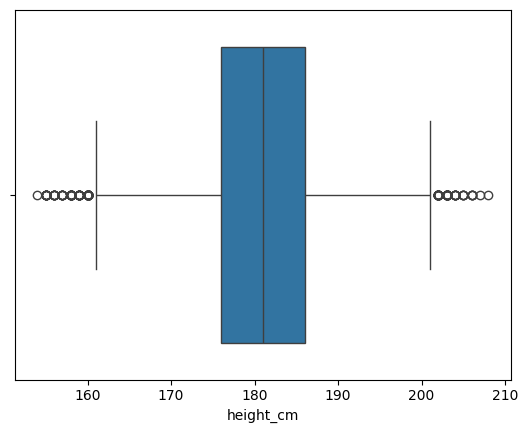

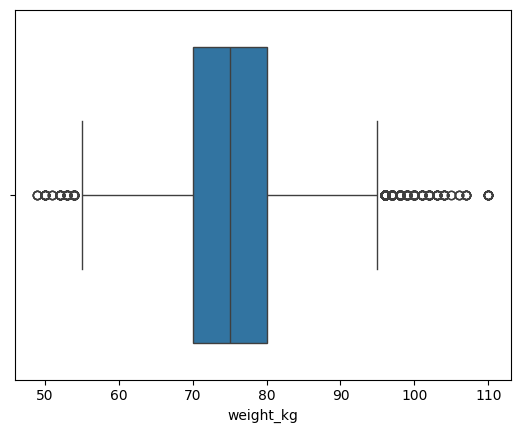

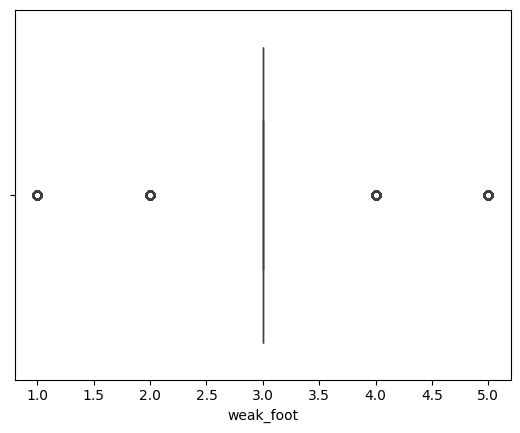

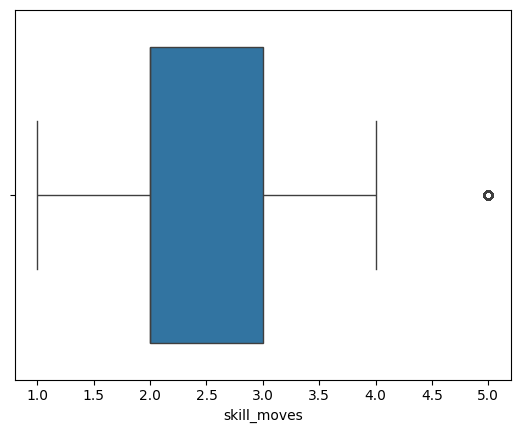

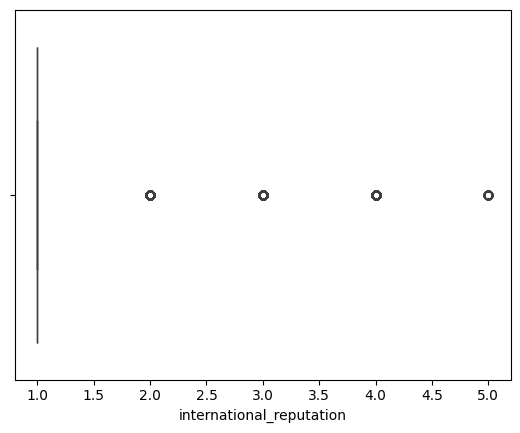

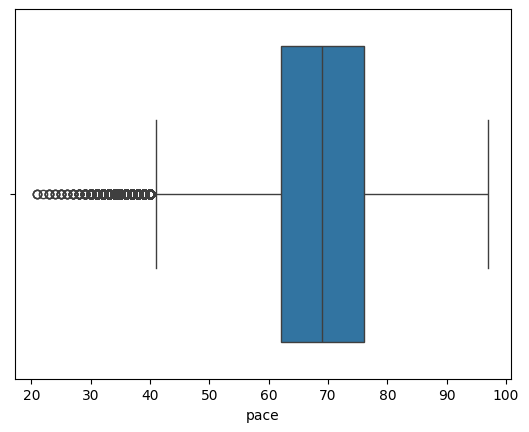

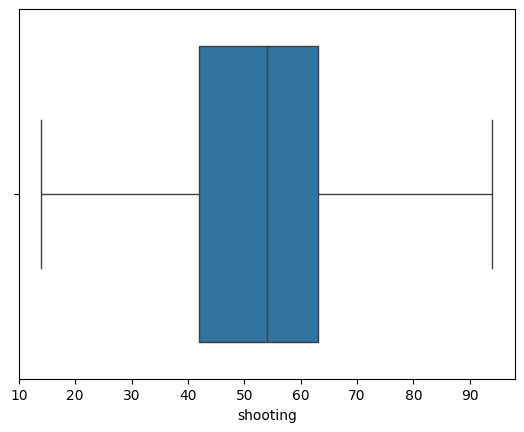

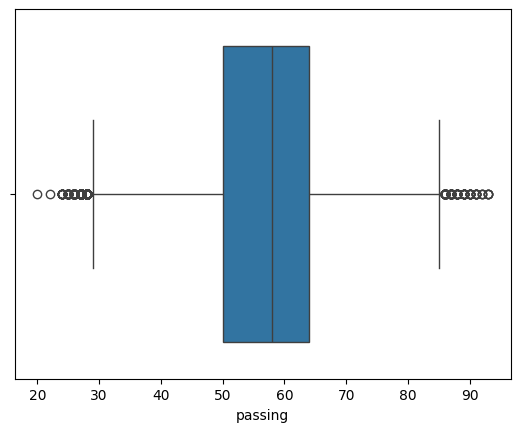

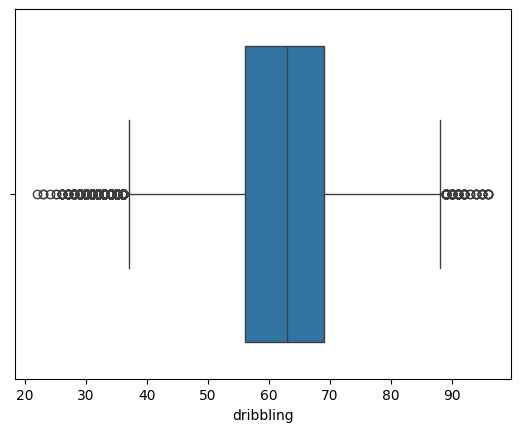

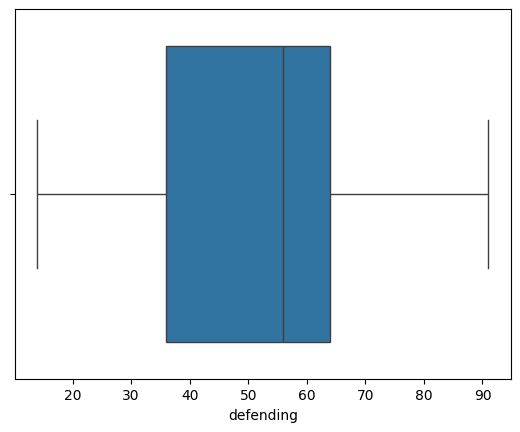

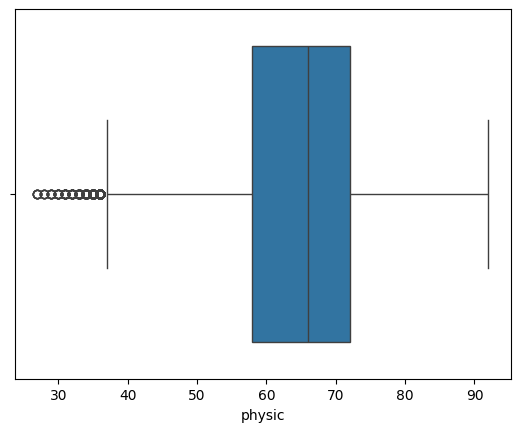

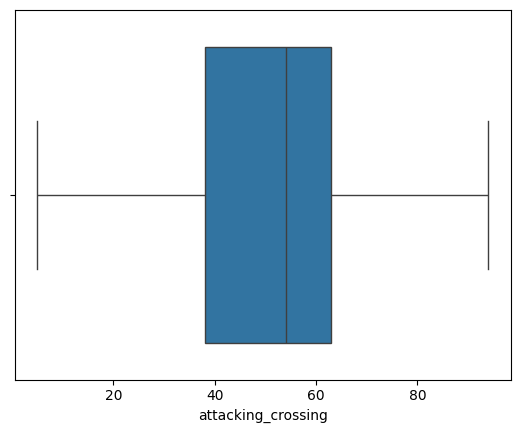

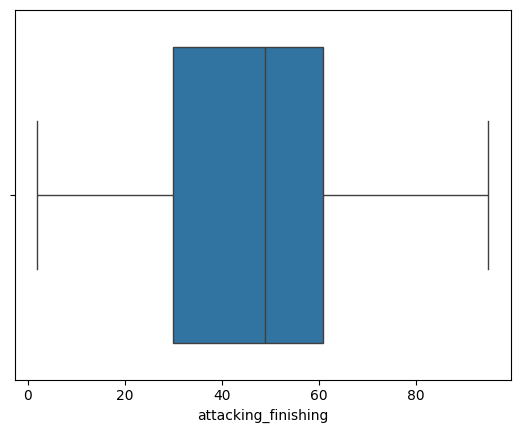

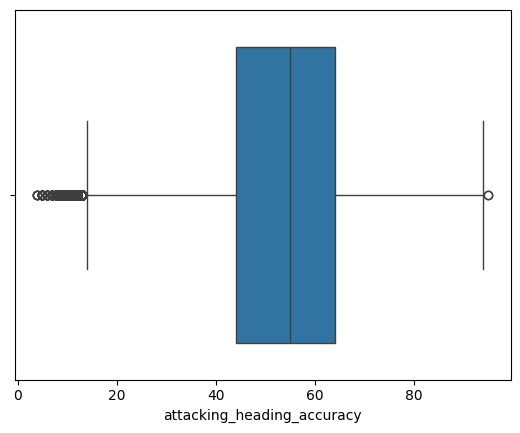

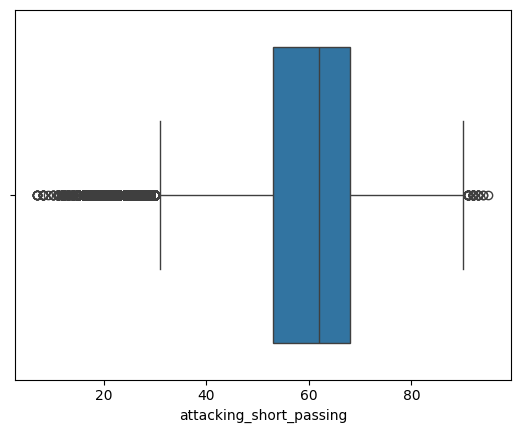

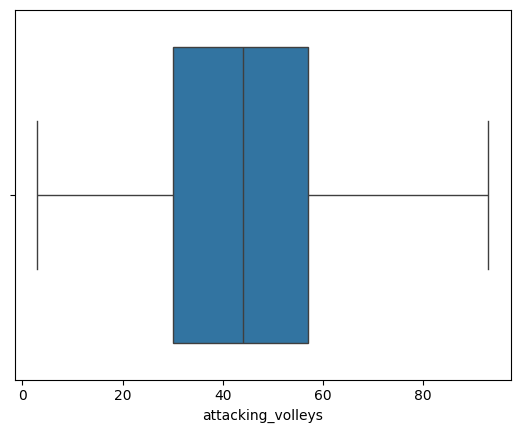

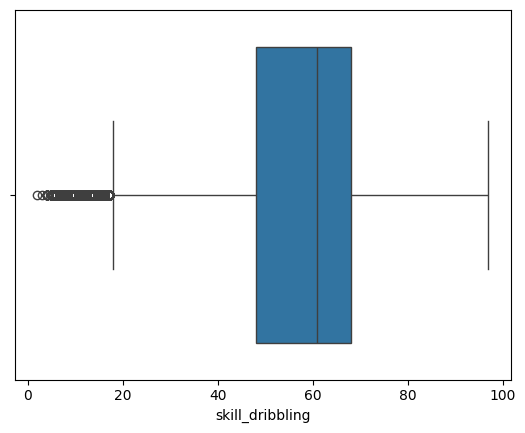

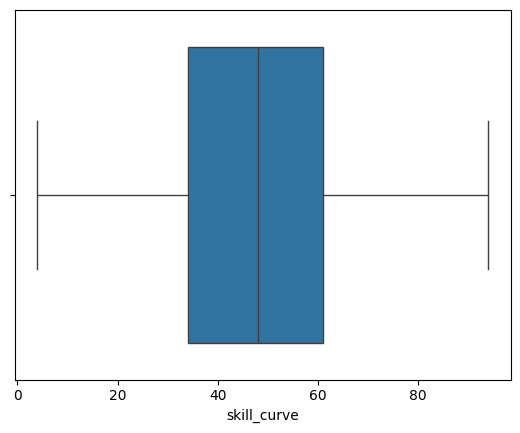

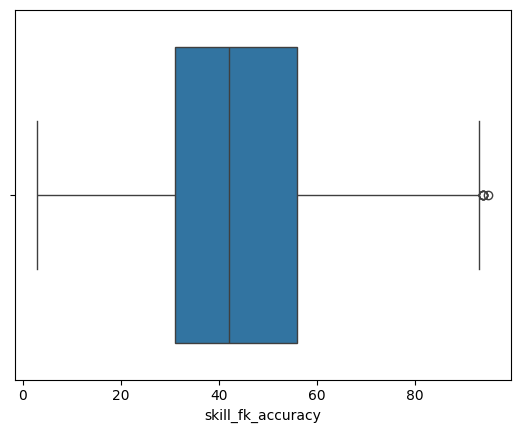

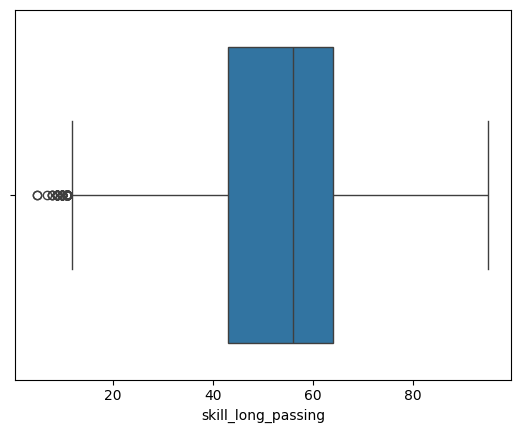

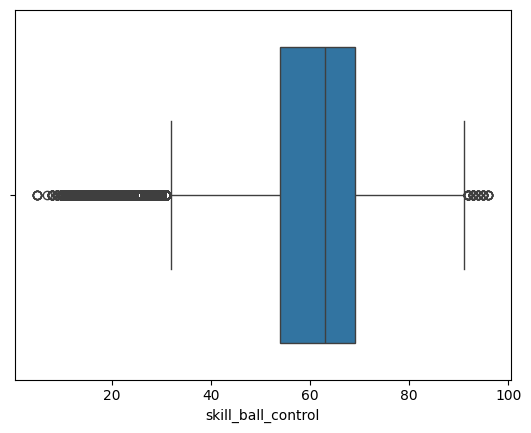

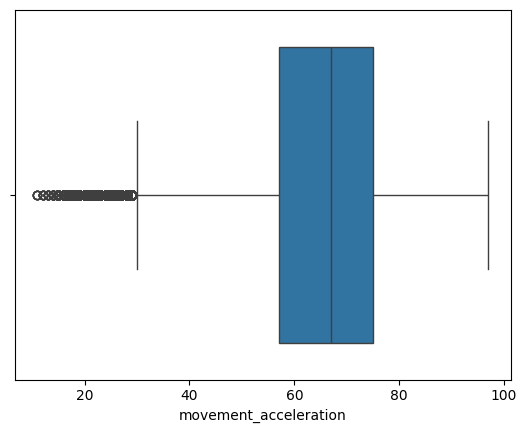

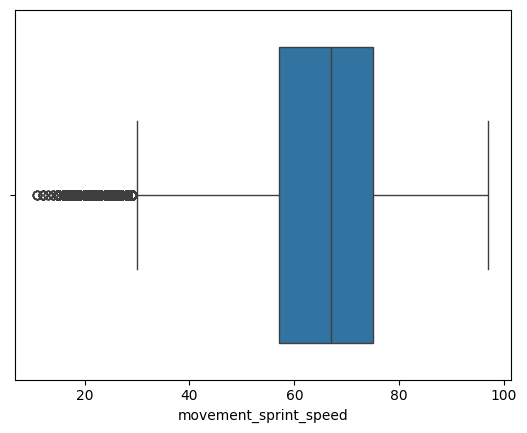

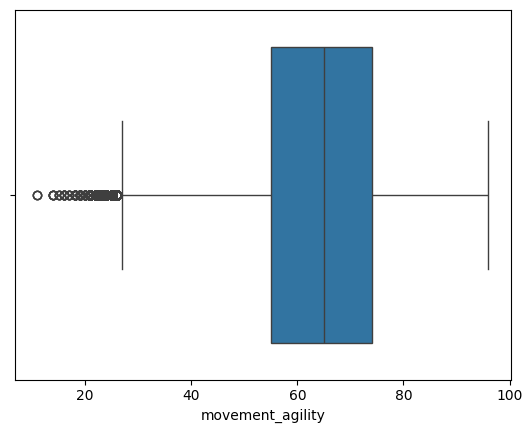

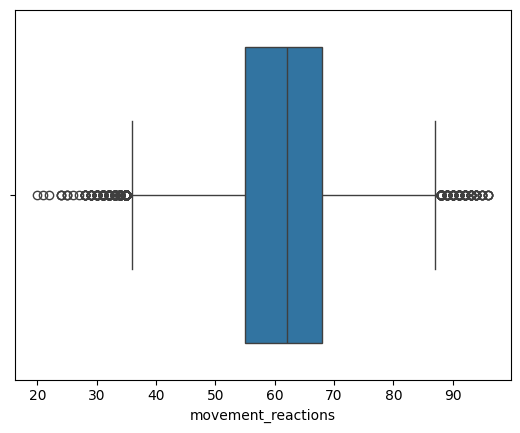

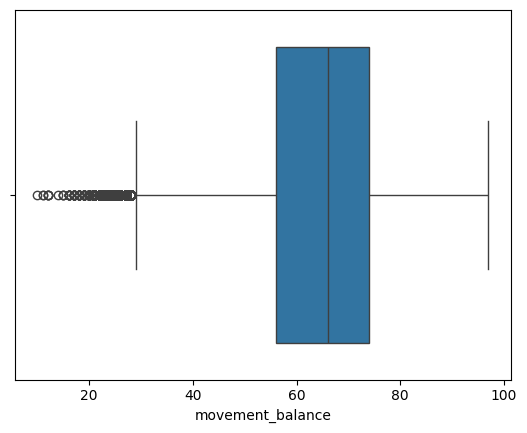

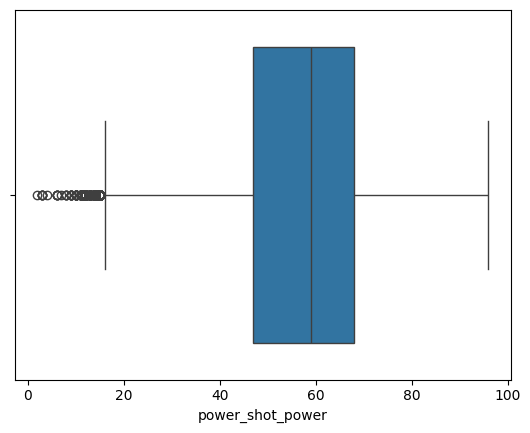

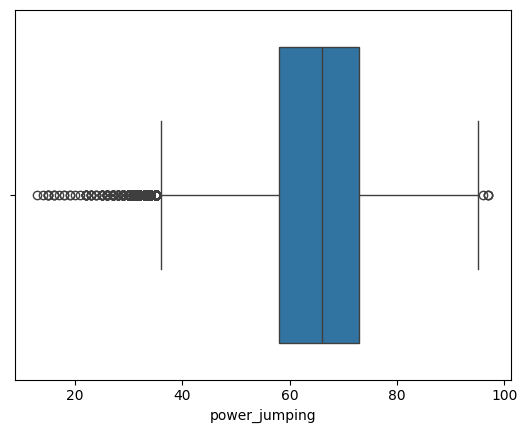

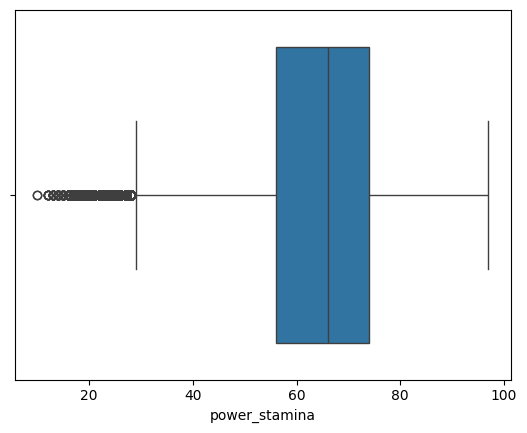

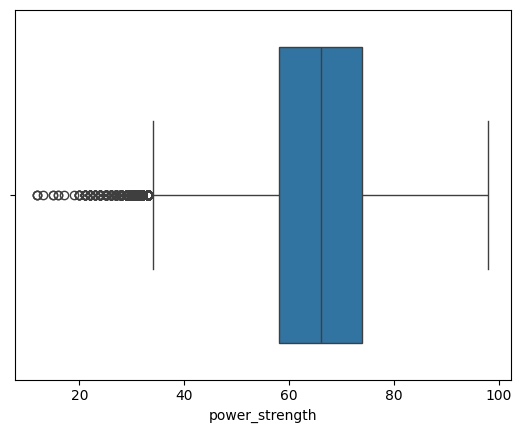

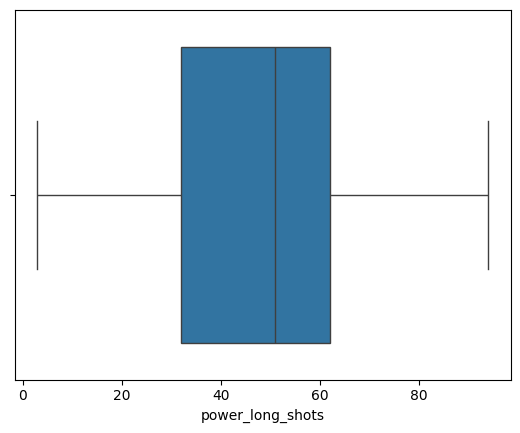

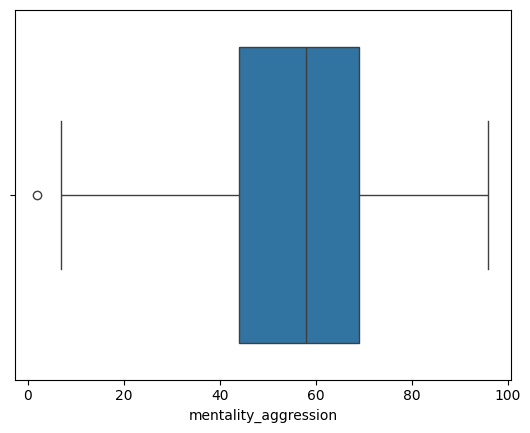

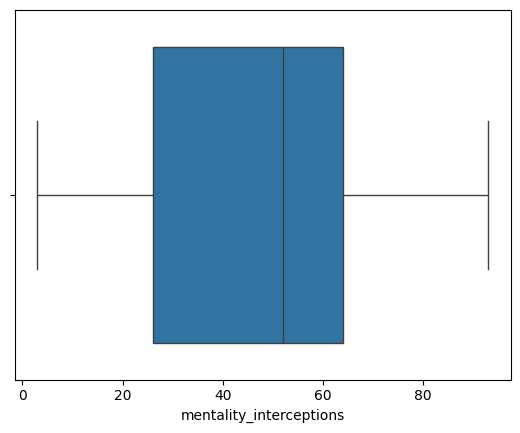

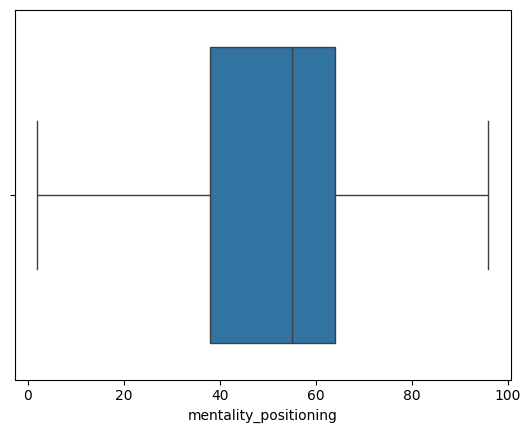

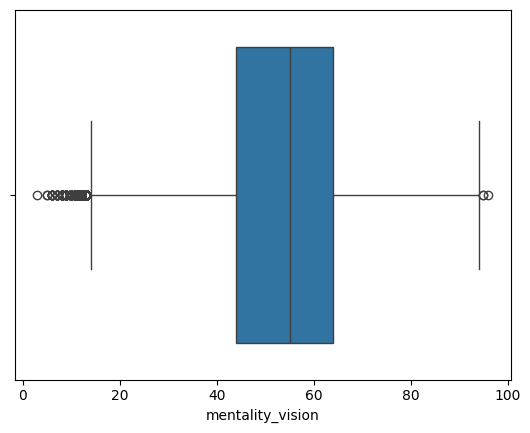

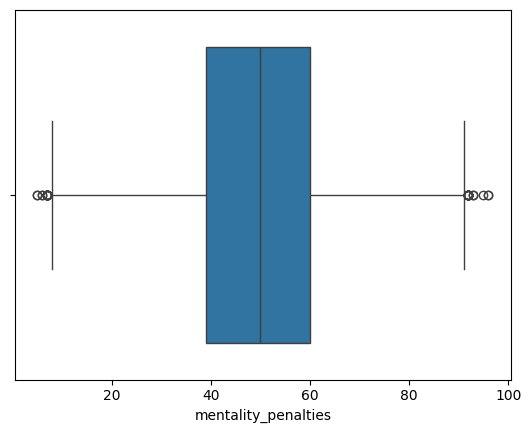

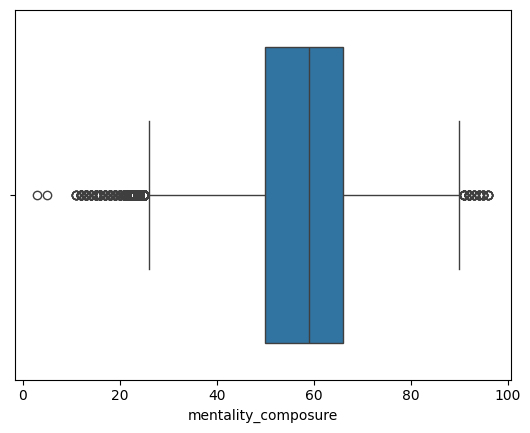

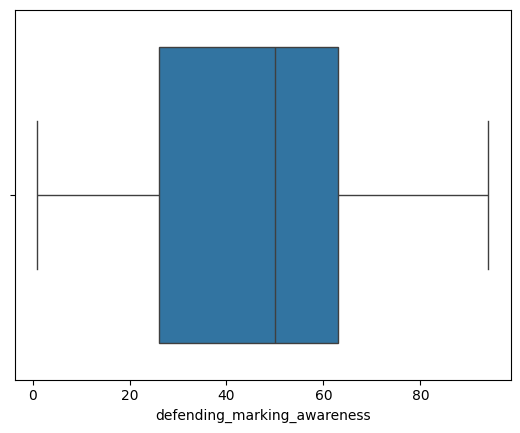

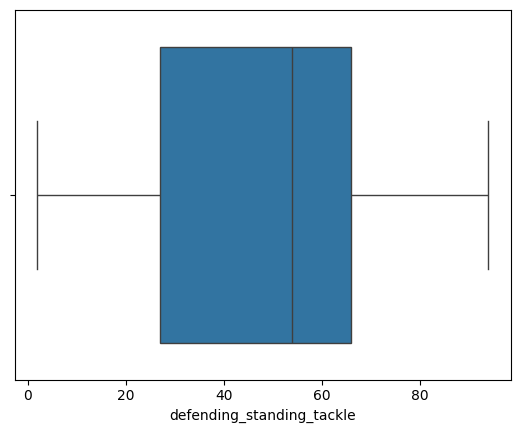

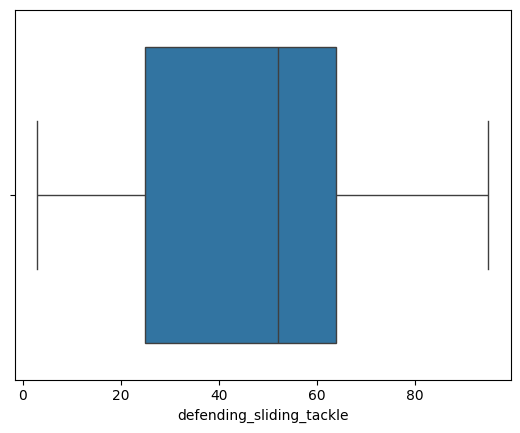

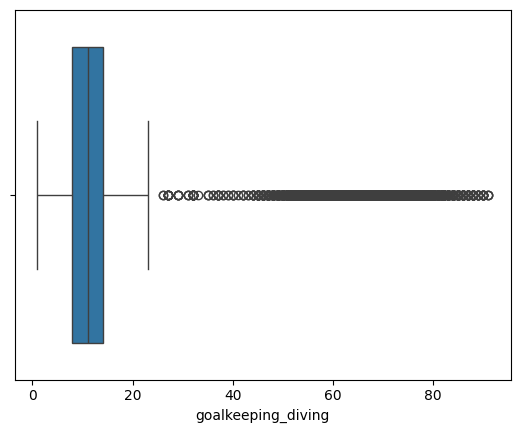

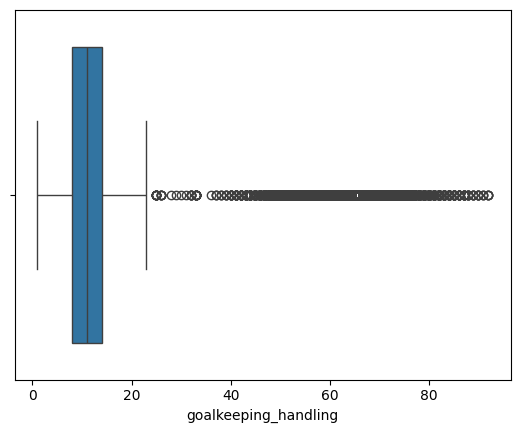

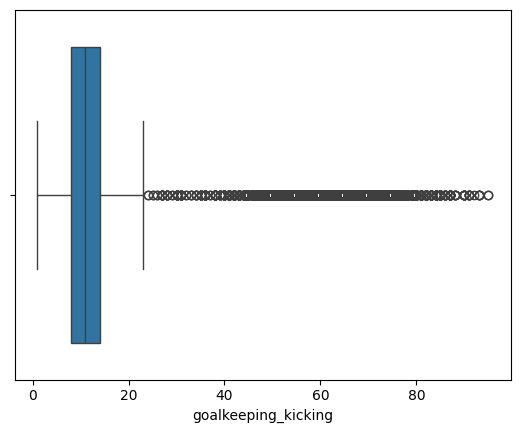

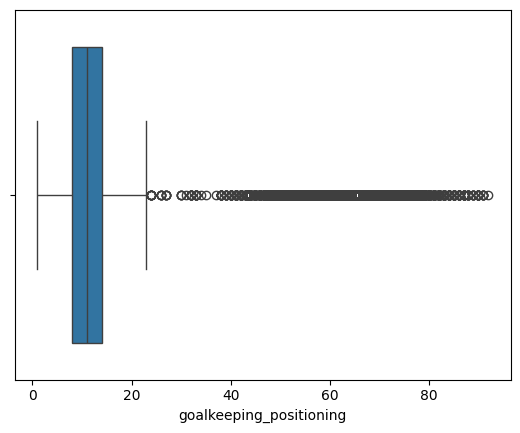

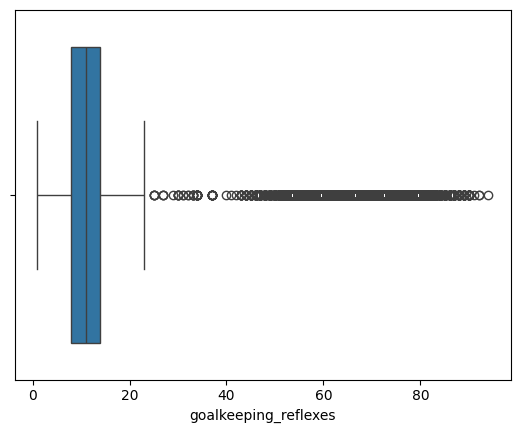

In [ ]:
# having boxplots to see outliers
for i in fifa_data.select_dtypes(include="number").columns:
    sns.boxplot(data= fifa_data, x=i)
    plt.show()

Scatterplot to show how strongly different variables are related to each other.


In [ ]:
#removing categorical values
foot = fifa_data.pop('preferred_foot')
workRate = fifa_data.pop('work_rate')
bodyType = fifa_data.pop('body_type')
traits = fifa_data.pop('player_traits')


In [ ]:
corr_matrix = fifa_data.corr()
corr_matrix

,overall,potential,age,height_cm,weight_kg,weak_foot,skill_moves,international_reputation,pace,shooting,...,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
overall,1.000000,0.695362,0.458390,0.044415,0.140015,0.217422,0.330951,0.485234,0.187184,0.482498,...,0.334488,0.683307,0.274173,0.250624,0.220398,-0.013603,-0.010862,-0.015521,-0.004731,-0.011783
potential,0.695362,1.000000,-0.201506,0.006744,-0.008111,0.167492,0.285126,0.367256,0.263615,0.317873,...,0.225312,0.423761,0.152613,0.152078,0.134847,-0.044826,-0.044119,-0.048803,-0.042978,-0.044156
age,0.458390,-0.201506,1.000000,0.081498,0.226143,0.076077,0.030409,0.254862,-0.199299,0.233889,...,0.135014,0.360231,0.153170,0.117334,0.099728,0.105135,0.110222,0.108064,0.118871,0.106004
height_cm,0.044415,0.006744,0.081498,1.000000,0.764081,-0.169790,-0.422632,0.041569,-0.409816,-0.190923,...,-0.326687,-0.163090,-0.053724,-0.059223,-0.069303,0.361519,0.361193,0.358273,0.360780,0.361376
weight_kg,0.140015,-0.008111,0.226143,0.764081,1.000000,-0.130435,-0.357432,0.088131,-0.367305,-0.095118,...,-0.244227,-0.071797,-0.039288,-0.051595,-0.063314,0.340277,0.339970,0.337763,0.341659,0.340076
weak_foot,0.217422,0.167492,0.076077,-0.169790,-0.130435,1.000000,0.338108,0.125581,0.141914,0.313187,...,0.334940,0.300883,0.044076,0.037699,0.020391,-0.228172,-0.227125,-0.223385,-0.225471,-0.228998
skill_moves,0.330951,0.285126,0.030409,-0.422632,-0.357432,0.338108,1.000000,0.179032,0.395034,0.583661,...,0.673549,0.571764,0.143183,0.144599,0.113840,-0.609174,-0.606615,-0.604504,-0.605512,-0.608444
international_reputation,0.485234,0.367256,0.254862,0.041569,0.088131,0.125581,0.179032,1.000000,0.026503,0.273351,...,0.211910,0.364801,0.096148,0.093740,0.080184,0.007831,0.008328,0.006148,0.010632,0.007910
pace,0.187184,0.263615,-0.199299,-0.409816,-0.367305,0.141914,0.395034,0.026503,1.000000,0.345689,...,0.201710,0.097171,-0.271302,-0.277880,-0.259231,-0.008403,-0.002714,0.000182,-0.018892,-0.008137
shooting,0.482498,0.317873,0.233889,-0.190923,-0.095118,0.313187,0.583661,0.273351,0.345689,1.000000,...,0.793835,0.533568,-0.429025,-0.446724,-0.478899,0.016867,0.024757,0.035248,0.018696,0.026999


<Axes: >

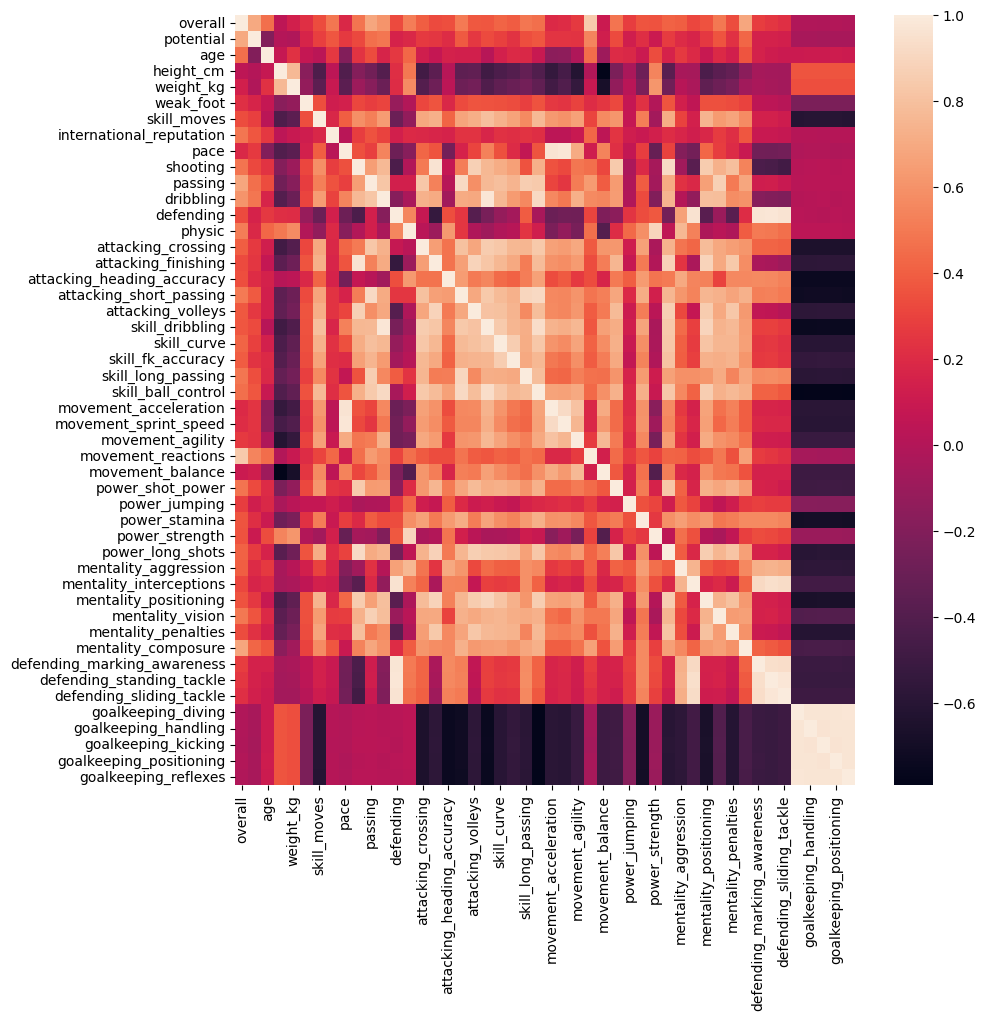

In [ ]:
#creating a heat map to understand the data more
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix)


#Imputation/ treating missing values
Choosing method for imputation depending on whether the data is categorical or numerical.

In [ ]:
#before choosing method for imputation, we need to separate dependent variable from the independent variable because we do not do imputation on dependent variables
Y = fifa_data['overall']
fifa_data.drop('overall',axis=1, inplace=True)

In [ ]:
#separating numerical and categorical variables

numeric_data= fifa_data.select_dtypes(include = np.number)
non_numeric = fifa_data.select_dtypes(include = ['object'])

In [ ]:
categorical_data = fifa_data[non_numeric]

In [ ]:
#multivariate imputation (recommended )

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer (max_iter=10, random_state=0)#assuming that in my data there is an order
numeric_data = pd.DataFrame(np.round(imp.fit_transform(numeric_data)),columns= numeric_data.copy().columns) #numeric data is holding all numeric values without missing values

In [ ]:
fifa_data.columns

Index(['potential', 'age', 'height_cm', 'weight_kg', 'weak_foot',
       'skill_moves', 'international_reputation', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle',
       'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
       '

In [ ]:
fifa_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161583 entries, 0 to 161582
Data columns (total 47 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   potential                    161583 non-null  int64  
 1   age                          161583 non-null  int64  
 2   height_cm                    161583 non-null  int64  
 3   weight_kg                    161583 non-null  int64  
 4   weak_foot                    161583 non-null  int64  
 5   skill_moves                  161583 non-null  int64  
 6   international_reputation     161583 non-null  int64  
 7   pace                         143614 non-null  float64
 8   shooting                     143614 non-null  float64
 9   passing                      143614 non-null  float64
 10  dribbling                    143614 non-null  float64
 11  defending                    143614 non-null  float64
 12  physic                       143614 non-null  float64
 13 

In [ ]:
fifa_data['mentality_composure'].isnull().sum()

32861

In [ ]:
numeric_data['mentality_composure'].isnull().sum() #to confirm if the missing values in the numeric data has been dealt with

0

In [ ]:
fifa_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161583 entries, 0 to 161582
Data columns (total 47 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   potential                    161583 non-null  int64  
 1   age                          161583 non-null  int64  
 2   height_cm                    161583 non-null  int64  
 3   weight_kg                    161583 non-null  int64  
 4   weak_foot                    161583 non-null  int64  
 5   skill_moves                  161583 non-null  int64  
 6   international_reputation     161583 non-null  int64  
 7   pace                         143614 non-null  float64
 8   shooting                     143614 non-null  float64
 9   passing                      143614 non-null  float64
 10  dribbling                    143614 non-null  float64
 11  defending                    143614 non-null  float64
 12  physic                       143614 non-null  float64
 13 

In [ ]:
#using KNN imputation of numeric variables to remove the NaN variables completely
from sklearn.impute import KNNImputer

In [ ]:
knn = KNNImputer (n_neighbors=8)#creates an instance of KNNImputer
imputed_numeric_data = knn.fit_transform(numeric_data)

In [ ]:
# Convert the resulting array back to a DataFrame
imputed_numeric_data_df = pd.DataFrame(imputed_numeric_data, columns=numeric_data.columns)
imputed_numeric_data_df


,potential,age,height_cm,weight_kg,weak_foot,skill_moves,international_reputation,pace,shooting,passing,...,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,95.0,27.0,169.0,67.0,3.0,4.0,5.0,93.0,89.0,86.0,...,76.0,92.0,25.0,21.0,20.0,6.0,11.0,15.0,14.0,8.0
1,92.0,29.0,185.0,80.0,4.0,5.0,5.0,93.0,93.0,81.0,...,85.0,92.0,22.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,90.0,30.0,180.0,80.0,2.0,4.0,5.0,93.0,86.0,83.0,...,80.0,90.0,29.0,26.0,26.0,10.0,8.0,11.0,5.0,15.0
3,90.0,32.0,195.0,95.0,4.0,4.0,5.0,76.0,91.0,81.0,...,91.0,93.0,25.0,41.0,27.0,13.0,15.0,10.0,9.0,12.0
4,90.0,28.0,193.0,92.0,4.0,1.0,5.0,60.0,29.0,33.0,...,37.0,60.0,25.0,25.0,25.0,87.0,85.0,92.0,90.0,86.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161578,61.0,18.0,180.0,73.0,3.0,2.0,1.0,63.0,48.0,40.0,...,54.0,40.0,23.0,21.0,25.0,9.0,13.0,13.0,12.0,7.0
161579,58.0,19.0,188.0,83.0,3.0,2.0,1.0,55.0,25.0,29.0,...,31.0,35.0,50.0,51.0,45.0,6.0,14.0,8.0,13.0,14.0
161580,58.0,19.0,181.0,73.0,2.0,2.0,1.0,65.0,36.0,43.0,...,37.0,35.0,36.0,45.0,50.0,8.0,9.0,7.0,14.0,9.0
161581,70.0,17.0,175.0,68.0,3.0,2.0,1.0,55.0,50.0,36.0,...,63.0,43.0,19.0,17.0,14.0,13.0,12.0,14.0,7.0,13.0


In [ ]:
# dealing with categorical values to remove NaN or missing values using simpleImputer.
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy='most_frequent')

In [ ]:
imputed_non_numeric = imputer.fit_transform(categorical_data)

In [ ]:
# Convert the resulting array back to a DataFrame
imputed_non_numeric_df = pd.DataFrame(imputed_non_numeric, columns=non_numeric.columns)
imputed_non_numeric_df


""
0
1
2
3
4
...
161578
161579
161580
161581


In [ ]:
#encoding of data (imputed_non_numeric)
#start by identifying categories in the various categorical columns

In [ ]:
foot.value_counts()

preferred_foot
Right    123711
Left      37872
Name: count, dtype: int64

In [ ]:
workRate.value_counts()

work_rate
Medium/Medium    88772
High/Medium      27830
Medium/High      14562
High/High         7902
Medium/Low        7843
High/Low          6444
Low/Medium        4071
Low/High          3824
Low/Low            335
Name: count, dtype: int64

In [ ]:
bodyType.value_counts()

body_type
Normal (170-185)    56834
Lean (170-185)      35066
Normal (185+)       33817
Lean (185+)         16544
Normal (170-)        5616
Stocky (170-185)     5298
Lean (170-)          3785
Stocky (185+)        3268
Stocky (170-)         918
Unique                437
Name: count, dtype: int64

Use get_dummies to encode

In [ ]:
foot = pd.get_dummies(foot, prefix='foot').astype(int)

In [ ]:
workRate = pd.get_dummies(workRate, prefix='workRate').astype(int)

In [ ]:
bodyType = pd.get_dummies(bodyType, prefix='bodyType').astype(int)

In [ ]:
#concatenating the imputed numeric data with the encoded categorical data

In [ ]:
cleaned_data = pd.concat([imputed_numeric_data_df,foot],axis=1).reset_index(drop=True)

In [ ]:
cleaned_data = pd.concat([imputed_numeric_data_df,workRate],axis=1).reset_index(drop=True)

In [ ]:
cleaned_data = pd.concat([imputed_numeric_data_df,bodyType],axis=1).reset_index(drop=True)

In [ ]:
cleaned_data

,potential,age,height_cm,weight_kg,weak_foot,skill_moves,international_reputation,pace,shooting,passing,...,bodyType_Lean (170-),bodyType_Lean (170-185),bodyType_Lean (185+),bodyType_Normal (170-),bodyType_Normal (170-185),bodyType_Normal (185+),bodyType_Stocky (170-),bodyType_Stocky (170-185),bodyType_Stocky (185+),bodyType_Unique
0,95.0,27.0,169.0,67.0,3.0,4.0,5.0,93.0,89.0,86.0,...,0,0,0,1,0,0,0,0,0,0
1,92.0,29.0,185.0,80.0,4.0,5.0,5.0,93.0,93.0,81.0,...,0,0,0,0,0,1,0,0,0,0
2,90.0,30.0,180.0,80.0,2.0,4.0,5.0,93.0,86.0,83.0,...,0,0,0,0,1,0,0,0,0,0
3,90.0,32.0,195.0,95.0,4.0,4.0,5.0,76.0,91.0,81.0,...,0,0,0,0,0,1,0,0,0,0
4,90.0,28.0,193.0,92.0,4.0,1.0,5.0,60.0,29.0,33.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161578,61.0,18.0,180.0,73.0,3.0,2.0,1.0,63.0,48.0,40.0,...,0,1,0,0,0,0,0,0,0,0
161579,58.0,19.0,188.0,83.0,3.0,2.0,1.0,55.0,25.0,29.0,...,0,0,0,0,0,1,0,0,0,0
161580,58.0,19.0,181.0,73.0,2.0,2.0,1.0,65.0,36.0,43.0,...,0,0,0,0,1,0,0,0,0,0
161581,70.0,17.0,175.0,68.0,3.0,2.0,1.0,55.0,50.0,36.0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
X = pd.concat([fifa_data,numeric_data],axis=1).reset_index(drop=True)

In [ ]:
X.head()

,potential,age,height_cm,weight_kg,weak_foot,skill_moves,international_reputation,pace,shooting,passing,...,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,95,27,169,67,3,4,5,93.0,89.0,86.0,...,76.0,92.0,25.0,21.0,20.0,6.0,11.0,15.0,14.0,8.0
1,92,29,185,80,4,5,5,93.0,93.0,81.0,...,85.0,92.0,22.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,90,30,180,80,2,4,5,93.0,86.0,83.0,...,80.0,90.0,29.0,26.0,26.0,10.0,8.0,11.0,5.0,15.0
3,90,32,195,95,4,4,5,76.0,91.0,81.0,...,91.0,93.0,25.0,41.0,27.0,13.0,15.0,10.0,9.0,12.0
4,90,28,193,92,4,1,5,NaN,NaN,NaN,...,37.0,60.0,25.0,25.0,25.0,87.0,85.0,92.0,90.0,86.0


# 2. Feature Engineering

Determining the feature importance by creating feature subsets which have better performance with overall rating.

Analyzing feature importance based on correlation matrix
We are using the target variable 'overall'

In [ ]:
correlated_matrix = cleaned_data.corrwith(Y).abs()
sorted_corr = correlated_matrix.sort_values(ascending=False)
sorted_corr

movement_reactions             0.845753
mentality_composure            0.698212
potential                      0.695362
passing                        0.511900
attacking_short_passing        0.499757
mentality_vision               0.493282
international_reputation       0.485234
skill_long_passing             0.483808
power_shot_power               0.480297
physic                         0.465660
age                            0.458390
skill_ball_control             0.457011
dribbling                      0.418740
skill_curve                    0.415863
power_long_shots               0.409086
shooting                       0.399721
mentality_aggression           0.398310
attacking_crossing             0.396833
skill_fk_accuracy              0.387269
attacking_volleys              0.377048
skill_dribbling                0.369827
power_stamina                  0.360025
power_strength                 0.350786
mentality_positioning          0.350178
attacking_heading_accuracy     0.340029


Selecting the top 35 features based on their correlation with the overall rating to create a subset of the data focused on the most relevant factors.

In [ ]:
num = 35
top_features = sorted_corr.index[:num]
feature_subset = cleaned_data[top_features]
feature_subset

,movement_reactions,mentality_composure,potential,passing,attacking_short_passing,mentality_vision,international_reputation,skill_long_passing,power_shot_power,physic,...,mentality_penalties,skill_moves,attacking_finishing,mentality_interceptions,defending,power_jumping,defending_marking_awareness,movement_agility,defending_standing_tackle,defending_sliding_tackle
0,94.0,92.0,95.0,86.0,89.0,90.0,5.0,76.0,80.0,63.0,...,76.0,4.0,94.0,22.0,27.0,73.0,25.0,94.0,21.0,20.0
1,90.0,92.0,92.0,81.0,82.0,81.0,5.0,72.0,94.0,79.0,...,85.0,5.0,95.0,24.0,32.0,94.0,22.0,93.0,31.0,23.0
2,89.0,90.0,90.0,83.0,86.0,84.0,5.0,76.0,86.0,64.0,...,80.0,4.0,85.0,39.0,32.0,61.0,29.0,93.0,26.0,26.0
3,85.0,93.0,90.0,81.0,84.0,83.0,5.0,76.0,93.0,86.0,...,91.0,4.0,91.0,20.0,34.0,72.0,25.0,86.0,41.0,27.0
4,89.0,60.0,90.0,33.0,42.0,20.0,5.0,41.0,42.0,62.0,...,37.0,1.0,25.0,30.0,26.0,78.0,25.0,43.0,25.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161578,39.0,40.0,61.0,40.0,38.0,42.0,1.0,33.0,64.0,44.0,...,54.0,2.0,49.0,21.0,24.0,41.0,23.0,54.0,21.0,25.0
161579,42.0,35.0,58.0,29.0,30.0,31.0,1.0,25.0,33.0,57.0,...,31.0,2.0,19.0,46.0,48.0,56.0,50.0,45.0,51.0,45.0
161580,50.0,35.0,58.0,43.0,51.0,40.0,1.0,43.0,51.0,53.0,...,37.0,2.0,30.0,43.0,43.0,52.0,36.0,58.0,45.0,50.0
161581,45.0,43.0,70.0,36.0,40.0,44.0,1.0,26.0,42.0,42.0,...,63.0,2.0,56.0,16.0,20.0,67.0,19.0,57.0,17.0,14.0


In [ ]:
# using random forest classifier to sort the most important features and reduce overfitting
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier()
#we should train the model
model.fit(cleaned_data, Y)

RandomForestClassifier()

In [ ]:
#accessing the feature importances
feature_importance = model.feature_importances_

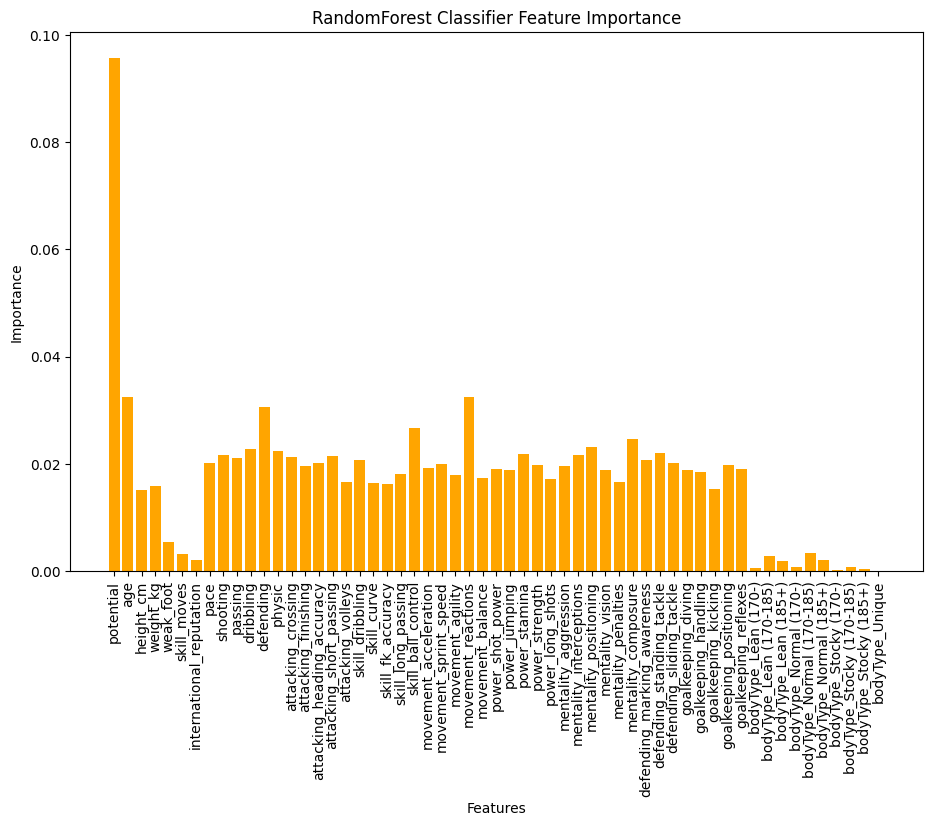

In [ ]:
#visualizing the feature importance
plt.figure (figsize=(11,7))
plt.bar(range(len(feature_importance)), feature_importance, tick_label=cleaned_data.columns, color='orange')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('RandomForest Classifier Feature Importance')
plt.xticks(rotation='vertical')
plt.show()

Sorting and ranking features based on the results in the barchart above.
Sorting will be done in descending order then provide a readable output message for all cleaned data columns

In [ ]:

features = cleaned_data.columns

In [ ]:
# Sort feature importance in descending order
sorted_indices = np.argsort(feature_importance)[::-1]

In [ ]:
print("Feature ranking based on Random Forest Classifier:")
for rank, idx in enumerate(sorted_indices, 1):
    print(f"{rank}. {features[idx]}: {feature_importance[idx]:.4f}")

Feature ranking based on Random Forest Classifier:
1. potential: 0.0957
2. age: 0.0324
3. movement_reactions: 0.0324
4. defending: 0.0305
5. skill_ball_control: 0.0267
6. mentality_composure: 0.0246
7. mentality_positioning: 0.0231
8. dribbling: 0.0228
9. physic: 0.0223
10. defending_standing_tackle: 0.0219
11. power_stamina: 0.0217
12. shooting: 0.0217
13. mentality_interceptions: 0.0216
14. attacking_short_passing: 0.0214
15. attacking_crossing: 0.0213
16. passing: 0.0211
17. defending_marking_awareness: 0.0207
18. skill_dribbling: 0.0206
19. attacking_heading_accuracy: 0.0202
20. pace: 0.0201
21. defending_sliding_tackle: 0.0201
22. movement_sprint_speed: 0.0200
23. power_strength: 0.0198
24. goalkeeping_positioning: 0.0198
25. mentality_aggression: 0.0197
26. attacking_finishing: 0.0195
27. movement_acceleration: 0.0193
28. power_shot_power: 0.0190
29. goalkeeping_reflexes: 0.0190
30. goalkeeping_diving: 0.0189
31. power_jumping: 0.0189
32. mentality_vision: 0.0188
33. goalkeeping_

In [ ]:
#Selecting the best 10 features using PCA from the model created based on the correlation matrix.
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_regression
#using features and my dependent variable, Y

In [ ]:
# using SelectKBest with f_regression to select the best features
kbest = SelectKBest(score_func=f_regression, k=10)
best_features = kbest.fit_transform(feature_subset, Y)

#getting column names from the feature subset
best_feature_indices = kbest.get_support(indices=True)
best_feature_names = feature_subset.columns[best_feature_indices]

In [ ]:
#initialize PCA model with the desired number of components (10)
pca = PCA(n_components=10)
#fitting and transforming the new model to the best featurs selected by selectKBest
selected_features_pca = pca.fit_transform(best_features)

# Get the explained variance of each principal component
explained_variance = pca.explained_variance_ratio_

# Sort the feature names based on the explained variance (highest variance first)
sorted_feature_names = [name for _, name in sorted(zip(explained_variance, best_feature_names), reverse=True)]

In [ ]:
# Select the top N feature names
top_n = 10
selected_feature_names = sorted_feature_names[:top_n]

In [ ]:
selected_features_pca = feature_subset[selected_feature_names]
selected_features_pca

,movement_reactions,mentality_composure,potential,passing,attacking_short_passing,mentality_vision,international_reputation,skill_long_passing,power_shot_power,physic
0,94.0,92.0,95.0,86.0,89.0,90.0,5.0,76.0,80.0,63.0
1,90.0,92.0,92.0,81.0,82.0,81.0,5.0,72.0,94.0,79.0
2,89.0,90.0,90.0,83.0,86.0,84.0,5.0,76.0,86.0,64.0
3,85.0,93.0,90.0,81.0,84.0,83.0,5.0,76.0,93.0,86.0
4,89.0,60.0,90.0,33.0,42.0,20.0,5.0,41.0,42.0,62.0
...,...,...,...,...,...,...,...,...,...,...
161578,39.0,40.0,61.0,40.0,38.0,42.0,1.0,33.0,64.0,44.0
161579,42.0,35.0,58.0,29.0,30.0,31.0,1.0,25.0,33.0,57.0
161580,50.0,35.0,58.0,43.0,51.0,40.0,1.0,43.0,51.0,53.0
161581,45.0,43.0,70.0,36.0,40.0,44.0,1.0,26.0,42.0,42.0


In [ ]:
#confirming whether the explained variable is 100%. If it is 100% it means that all the important information from the original data has been captured and there is no leftover variability in the data that has not been accounted for.
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance: {explained_variance.sum() * 100:.2f}%")


Explained Variance: 100.00%


Scalling the independent variables

Scalling our data to compress the variability of variables for the model to analyze quickly.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(selected_features_pca)

In [ ]:
scaled_dataframe = pd.DataFrame(scaled_features, columns =selected_features_pca.columns)
X = scaled_dataframe
X

,movement_reactions,mentality_composure,potential,passing,attacking_short_passing,mentality_vision,international_reputation,skill_long_passing,power_shot_power,physic
0,3.535775,2.866972,3.875315,2.309133,2.086204,2.588430,10.148137,1.536683,1.499832,0.020346
1,3.099571,2.866972,3.396013,1.954627,1.609554,1.957672,10.148137,1.273977,2.401757,1.461508
2,2.990520,2.700643,3.076478,2.096429,1.881925,2.167924,10.148137,1.536683,1.886371,0.110419
3,2.554317,2.950136,3.076478,1.954627,1.745740,2.097840,10.148137,1.536683,2.337334,2.092016
4,2.990520,0.205706,3.076478,-1.448624,-1.114157,-2.317466,10.148137,-0.761996,-0.948252,-0.069727
...,...,...,...,...,...,...,...,...,...,...
161578,-2.462022,-1.457586,-1.556774,-0.952316,-1.386528,-0.775613,-0.279299,-1.287408,0.469059,-1.691034
161579,-2.134869,-1.873408,-2.036076,-1.732228,-1.931270,-1.546539,-0.279299,-1.812820,-1.528062,-0.520090
161580,-1.262462,-1.873408,-2.036076,-0.739613,-0.501322,-0.915781,-0.279299,-0.630643,-0.368443,-0.880380
161581,-1.807717,-1.208092,-0.118868,-1.235921,-1.250342,-0.635445,-0.279299,-1.747144,-0.948252,-1.871179


# 3. Training Models

creating and training a suitable machine learning model with cross-validation that can predict a player's rating

Train atleast 3 models. It can be either RandomForest, XGBoost, Gradient Boost (cross-validation) that can predict a players rating.

In [ ]:
from sklearn.model_selection import cross_val_score, train_test_split, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score
from sklearn.tree import DecisionTreeRegressor

In [ ]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [ ]:
lin = LinearRegression()

In [ ]:
lin.fit(Xtrain, Ytrain)
y_pred = lin.predict(Xtest)

In [ ]:
print(f"""mean absolute error: {mean_absolute_error(y_pred,Ytest)},
     mean squared error: {mean_squared_error(y_pred,Ytest)},
     root mean squared error: {np.sqrt(mean_squared_error(y_pred,Ytest))},
     R2 Score: {r2_score(y_pred,Ytest)}
     """)

mean absolute error: 2.24482950206488,
     mean squared error: 8.470686106250293,
     root mean squared error: 2.9104443142328447,
     R2 Score: 0.7933651659072947
     


In [ ]:
decTree = DecisionTreeRegressor()

In [ ]:
decTree.fit(Xtrain, Ytrain)

DecisionTreeRegressor()

In [ ]:
dec_pred = decTree.predict(Xtest)

In [ ]:
print(f"""mean absolute error: {mean_absolute_error(dec_pred,Ytest)},
     mean squared error: {mean_squared_error(dec_pred,Ytest)},
     root mean squared error: {np.sqrt(mean_squared_error(dec_pred,Ytest))},
     R2 Score: {r2_score(dec_pred,Ytest)}
     """)

mean absolute error: 1.7804509494486904,
     mean squared error: 7.39050740408385,
     root mean squared error: 2.718548768016467,
     R2 Score: 0.8510336690607467
     


In [ ]:
# Initializing the regressor
gb_regressor = GradientBoostingRegressor()

In [ ]:
parameters =  {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 4, 5],
        'learning_rate': [0.01, 0.1, 0.2]
    }

In [ ]:
r_search = RandomizedSearchCV(gb_regressor, parameters, cv = 3, scoring = 'neg_mean_squared_error')

In [ ]:
r_search.fit(Xtrain,Ytrain)

RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(),
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 4, 5],
                                        'n_estimators': [100, 200, 300]},
                   scoring='neg_mean_squared_error')

# 4. Evaluation

Used MAE or RMSE and then fine tuned model, train and tested it again.

In [ ]:
r_search_pred = r_search.predict(Xtest)

In [ ]:
print(f"""mean absolute error: {mean_absolute_error(r_search_pred,Ytest)},
     mean squared error: {mean_squared_error(r_search_pred,Ytest)},
     root mean squared error: {np.sqrt(mean_squared_error(r_search_pred,Ytest))},
     R2 Score: {r2_score(r_search_pred,Ytest)}
     """)

mean absolute error: 1.4614060880654285,
     mean squared error: 3.9177912994583117,
     root mean squared error: 1.9793411276124973,
     R2 Score: 0.9143533349929668
     


# 5. Test with new Data set

In [ ]:
#reading testing dataset
test_data = pd.read_csv('/content/drive/MyDrive/players_22.csv')
copy = test_data.copy()

In [ ]:
#dropping the same columns as the training dataset for easy comparison including the 'overall'
test_data = test_data[['movement_reactions','overall','mentality_composure','potential','passing','attacking_short_passing','mentality_vision','international_reputation','skill_long_passing','power_shot_power','physic']]
test_data

,movement_reactions,overall,mentality_composure,potential,passing,attacking_short_passing,mentality_vision,international_reputation,skill_long_passing,power_shot_power,physic
0,94,93,96,93,91.0,91,95,5,91,86,65.0
1,93,92,88,92,79.0,85,81,5,70,90,82.0
2,94,91,95,91,80.0,80,76,5,77,94,75.0
3,89,91,93,91,86.0,86,90,5,81,80,63.0
4,91,91,89,91,93.0,94,94,4,93,91,78.0
...,...,...,...,...,...,...,...,...,...,...,...
19234,53,47,37,52,46.0,50,43,1,48,46,49.0
19235,49,47,47,59,50.0,51,49,1,50,49,51.0
19236,46,47,36,55,45.0,49,46,1,49,50,52.0
19237,48,47,47,60,36.0,38,40,1,33,48,42.0


Removing the useless variables with 30% missing values

In [ ]:
threshold = 0.30 *len(test_data)

In [ ]:

test_data = test_data.dropna(thresh=threshold, axis =1)

In [ ]:
#splitting numerical and categorical data

In [ ]:
Ytest = test_data['overall']
test_data.drop('overall', axis=1,inplace=True)

In [ ]:
numeric_col = test_data.select_dtypes(include=['int64', 'float64']).columns
non_numeric_col = test_data.select_dtypes(include=['object']).columns


In [ ]:
nonnumeric_var_test = test_data[non_numeric_col]
numeric_var_test = test_data[numeric_col]

In [ ]:
#encoding numerical data

Performing KNN Imputation on numerical variables. We'll start by checking the numerical variables in our dataset.

In [ ]:
knn_imputer = KNNImputer(n_neighbors=8)
numeric_var_imputed_2 = knn_imputer.fit_transform(numeric_var_test)
numeric_columns = list(numeric_var_test.columns)
numeric_var_imputed_2 = pd.DataFrame(numeric_var_imputed_2, columns=numeric_col)


Concatenating the cleaned numerical data and the rest of the categorical dataset.
We'll rename the numerical datasets as Xtest for testing.

In [ ]:
Xtest = numeric_var_imputed_2
Xtest

,movement_reactions,mentality_composure,potential,passing,attacking_short_passing,mentality_vision,international_reputation,skill_long_passing,power_shot_power,physic
0,94.0,96.0,93.0,91.0,91.0,95.0,5.0,91.0,86.0,65.0
1,93.0,88.0,92.0,79.0,85.0,81.0,5.0,70.0,90.0,82.0
2,94.0,95.0,91.0,80.0,80.0,76.0,5.0,77.0,94.0,75.0
3,89.0,93.0,91.0,86.0,86.0,90.0,5.0,81.0,80.0,63.0
4,91.0,89.0,91.0,93.0,94.0,94.0,4.0,93.0,91.0,78.0
...,...,...,...,...,...,...,...,...,...,...
19234,53.0,37.0,52.0,46.0,50.0,43.0,1.0,48.0,46.0,49.0
19235,49.0,47.0,59.0,50.0,51.0,49.0,1.0,50.0,49.0,51.0
19236,46.0,36.0,55.0,45.0,49.0,46.0,1.0,49.0,50.0,52.0
19237,48.0,47.0,60.0,36.0,38.0,40.0,1.0,33.0,48.0,42.0


In [ ]:
# scalling independent variables

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
scaled_features=scaler.fit_transform(Xtest)

making a dataFrame with the used and extracted columns

In [ ]:
order_cols = ['movement_reactions','mentality_composure','potential','passing','attacking_short_passing','mentality_vision','international_reputation','skill_long_passing','power_shot_power','physic']

newX = pd.DataFrame(scaled_features, columns=order_cols)

newX

,movement_reactions,mentality_composure,potential,passing,attacking_short_passing,mentality_vision,international_reputation,skill_long_passing,power_shot_power,physic
0,3.599846,3.131025,3.601780,2.997359,2.217457,3.006228,10.525295,2.524112,2.139433,0.091479
1,3.489252,2.473077,3.437470,2.004575,1.803392,1.980597,10.525295,1.126551,2.442649,1.871371
2,3.599846,3.048782,3.273160,2.087307,1.458338,1.614300,10.525295,1.592404,2.745866,1.138474
3,3.046874,2.884295,3.273160,2.583699,1.872403,2.639931,10.525295,1.858606,1.684607,-0.117920
4,3.268063,2.555321,3.273160,3.162823,2.424490,2.932969,7.830520,2.657213,2.518454,1.452573
...,...,...,...,...,...,...,...,...,...,...
19234,-0.934526,-1.721343,-3.134932,-0.725580,-0.611986,-0.803260,-0.253804,-0.337561,-0.892735,-1.583714
19235,-1.376903,-0.898908,-1.984762,-0.394652,-0.542976,-0.363704,-0.253804,-0.204460,-0.665323,-1.374315
19236,-1.708687,-1.803587,-2.642002,-0.808312,-0.680997,-0.583482,-0.253804,-0.271010,-0.589519,-1.269615
19237,-1.487498,-0.898908,-1.820452,-1.552899,-1.440116,-1.023038,-0.253804,-1.335819,-0.741127,-2.316611


In [ ]:
#evaluating model using new dataset

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# using randomized search to train regression model
predictions = r_search.predict(newX)

# Calculate multiple metrics
mae, mse, rmse, r2 = mean_absolute_error(Ytest, predictions), mean_squared_error(Ytest, predictions), np.sqrt(mean_squared_error(Ytest, predictions)), r2_score(Ytest, predictions)

# Print the metrics
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")


MAE: 1.6012231920012283
MSE: 4.662017232629671
RMSE: 2.1591704964244185
R2 Score: 0.9015104064033859


# 6. Deployment

In [ ]:
import joblib

In [ ]:
#save the model
joblib.dump(r_search, 'trained_model.pkl')

['trained_model.pkl']

In [ ]:

['trained_model.pkl']

['trained_model.pkl']

In [ ]:
import sklearn

print(f"NumPy version: {np.__version__}")
print(f"joblib version: {joblib.__version__}")
print(f"pandas version: {sklearn.__version__}")

NumPy version: 1.25.2
joblib version: 1.4.2
pandas version: 1.2.2
